<a href="https://colab.research.google.com/github/JacobyNevada/ds_belhard/blob/main/hw6/hw6_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# https://www.kaggle.com/datasets/joannanplkrk/its-raining-cats
df = pd.read_csv("cat_breeds.csv", sep=';')
print(df)

           Breed  Age_in_years  Age_in_months  Gender  Neutered_or_spayed  \
0         Angora          0.25              3  female               False   
1         Angora          0.33              4    male               False   
2         Angora          0.50              6    male               False   
3         Angora          0.50              6  female               False   
4         Angora          0.50              6    male               False   
...          ...           ...            ...     ...                 ...   
1066  Maine coon          0.17              2  female               False   
1067  Maine coon          0.17              2  female               False   
1068  Maine coon          0.17              2    male               False   
1069  Maine coon          0.17              2    male               False   
1070  Maine coon          0.17              2  female               False   

      Body_length  Weight Fur_colour_dominant Fur_pattern Eye_colour  \
0  

**Колонки**:

Breed - Порода кошки (категориальное значение)

Age_in_years - Возраст в годах (цифровое значение)

Age_in_months - Возраст в месяцах (цифровое значение)

Gender - Пол (категориальное значение)

Neutered_or_spayed - Стерилизована или нет (категориальное значение)

Body_length - Длина тела (цифровое значение)

Weight - Вес (цифровое значение)

Fur_colour_dominant - Преобладающий цвет шерсти (категориальное значение)

Fur_pattern - Тип окраса шерсти (категориальное значение)

Eye_colour - Цвет глаз (категориальное значение)

Allowed_outdoor - Ходит ли на улицу (категориальное значение)

Preferred_food - Предпочитаемый тип еды (категориальное значение)

Owner_play_time_minutes - Время игры с хозяином, минуты (цифровое значение)

Sleep_time_hours - Время сна, часы (цифровое значение)

Country - Страна проживания (категориальное значение)

Latitude - Широта (цифровое значение)

Longitude - Долгота(цифровое значение)

Размер датасета: (1071, 17)

Типы данных:
Breed                       object
Age_in_years               float64
Age_in_months                int64
Gender                      object
Neutered_or_spayed            bool
Body_length                  int64
Weight                     float64
Fur_colour_dominant         object
Fur_pattern                 object
Eye_colour                  object
Allowed_outdoor               bool
Preferred_food              object
Owner_play_time_minutes      int64
Sleep_time_hours             int64
Country                     object
Latitude                   float64
Longitude                  float64
dtype: object

Пропущенные значения:
Breed                      0
Age_in_years               0
Age_in_months              0
Gender                     0
Neutered_or_spayed         0
Body_length                0
Weight                     0
Fur_colour_dominant        0
Fur_pattern                0
Eye_colour                 0
Allowed_outdoor            0
Preferr

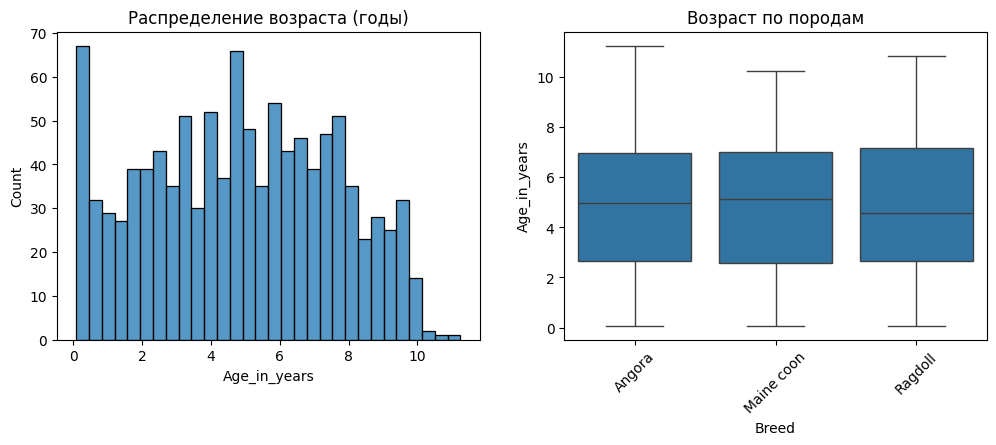

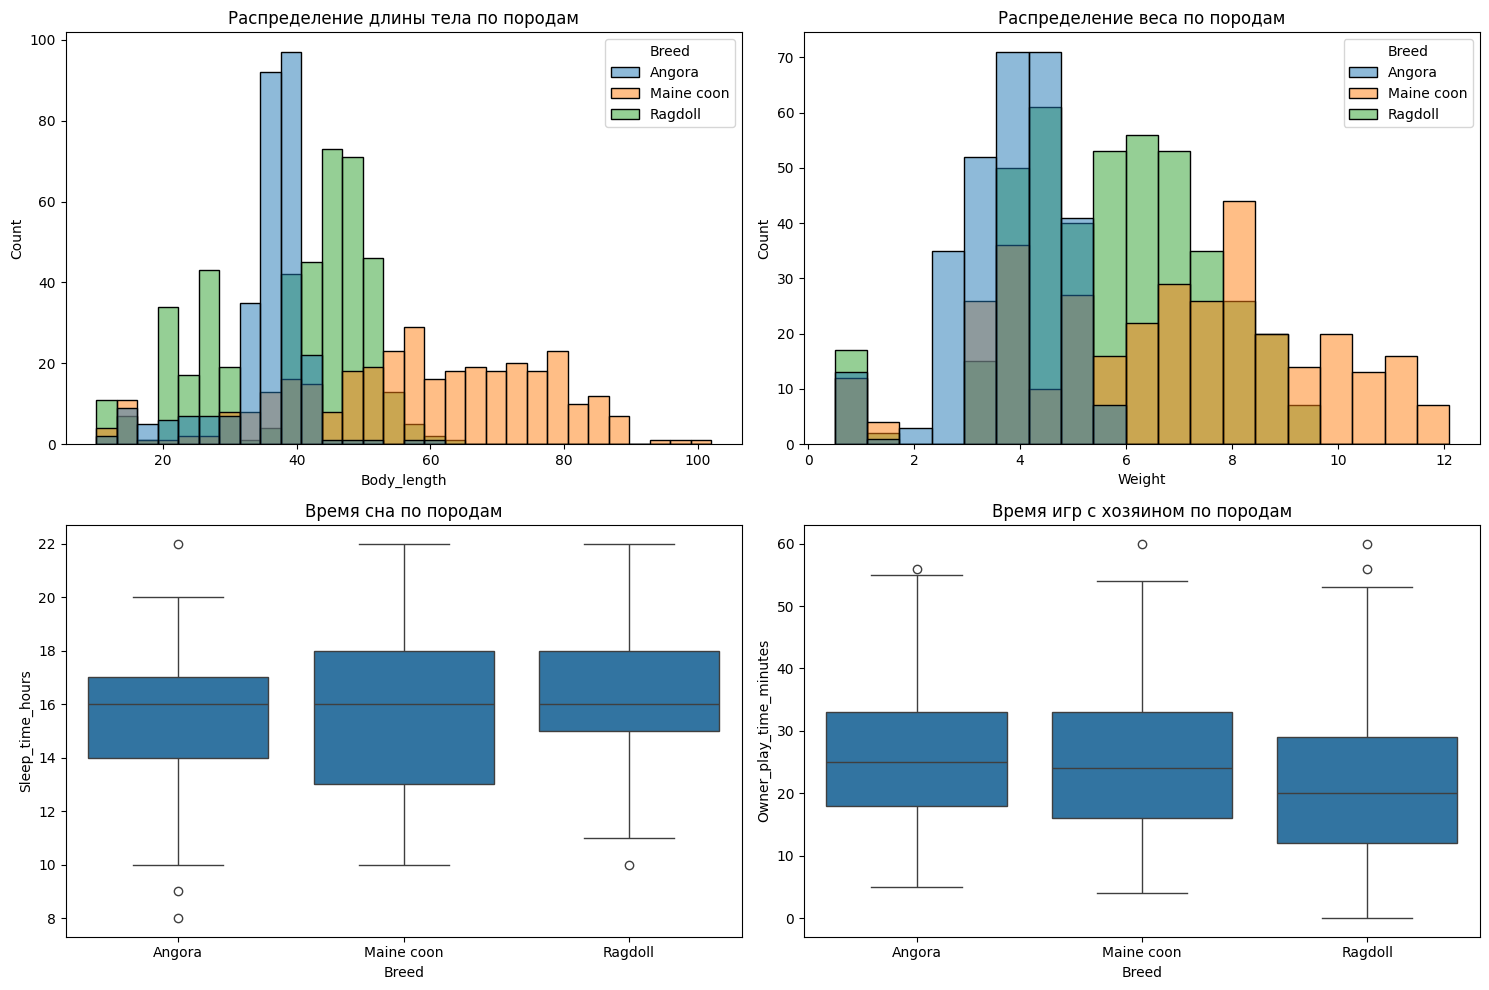

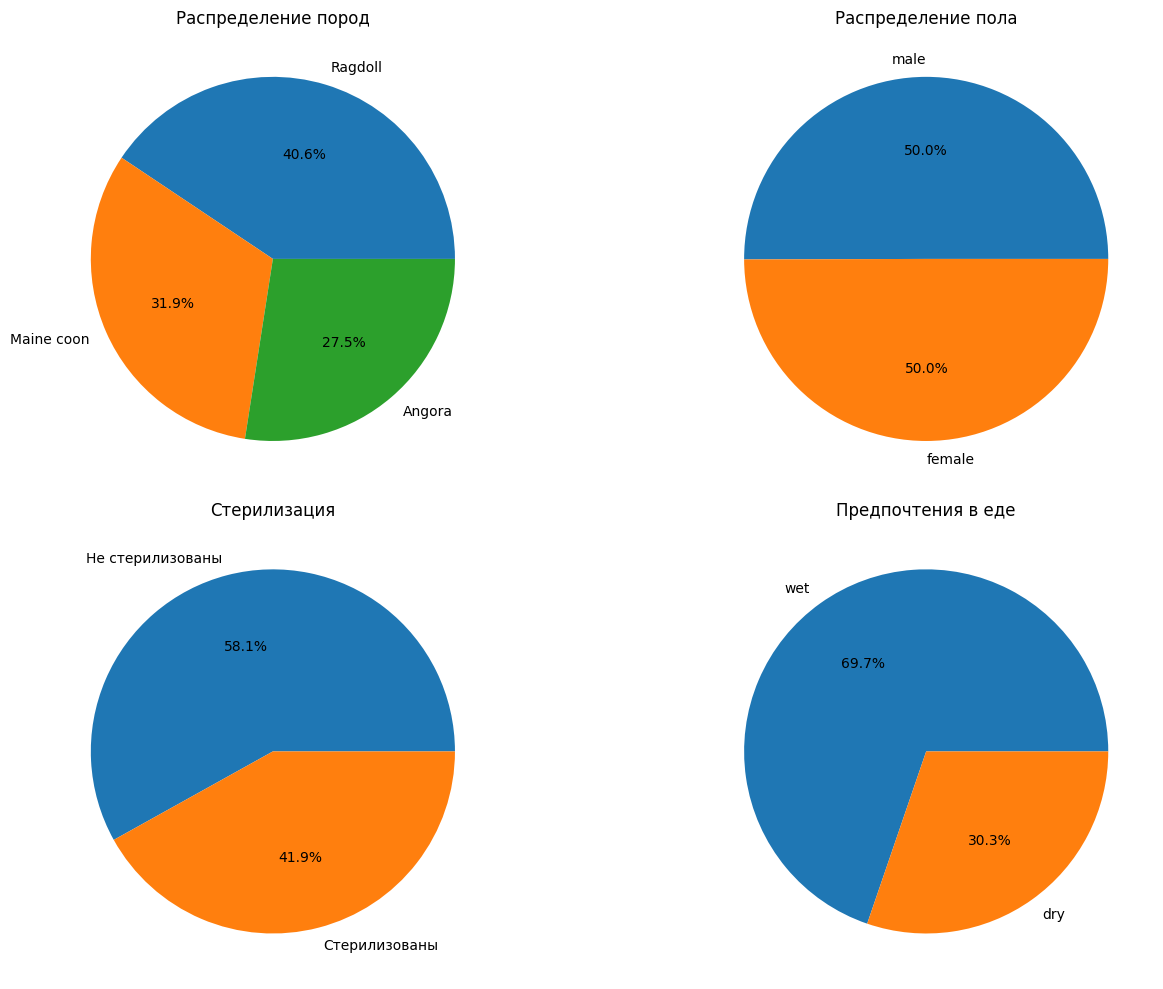

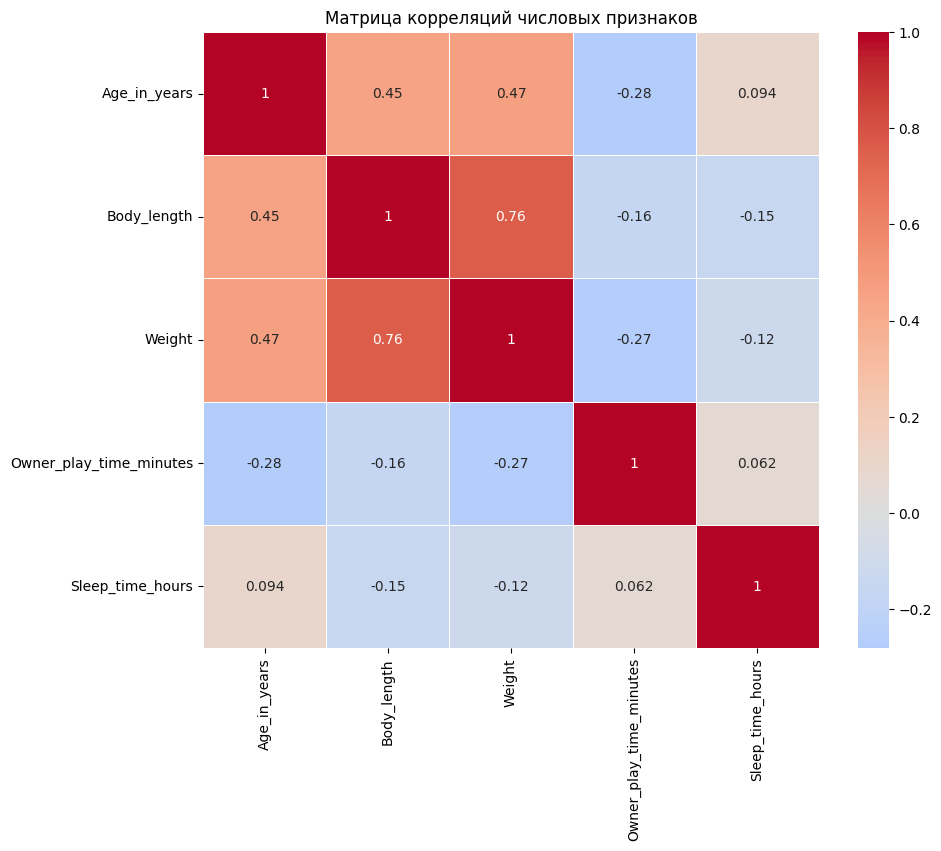

Средние показатели по породам:
            Age_in_years  Body_length    Weight
Breed                                          
Angora          4.857653    35.333333  3.792177
Maine coon      4.901491    57.713450  6.736082
Ragdoll         4.793172    39.085057  5.669172


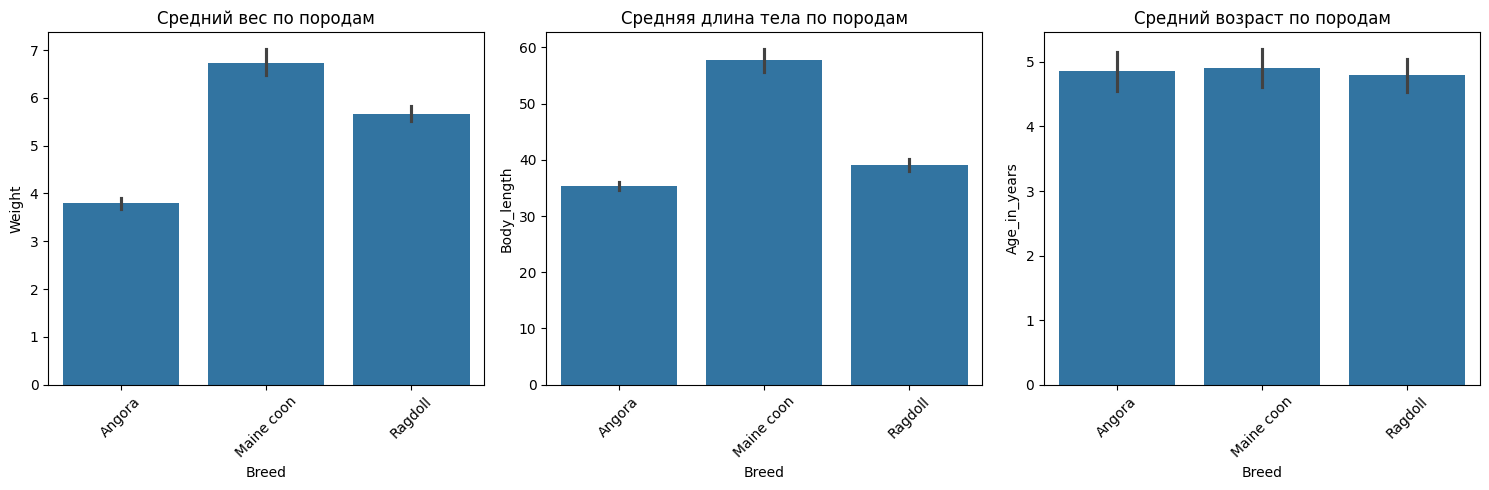

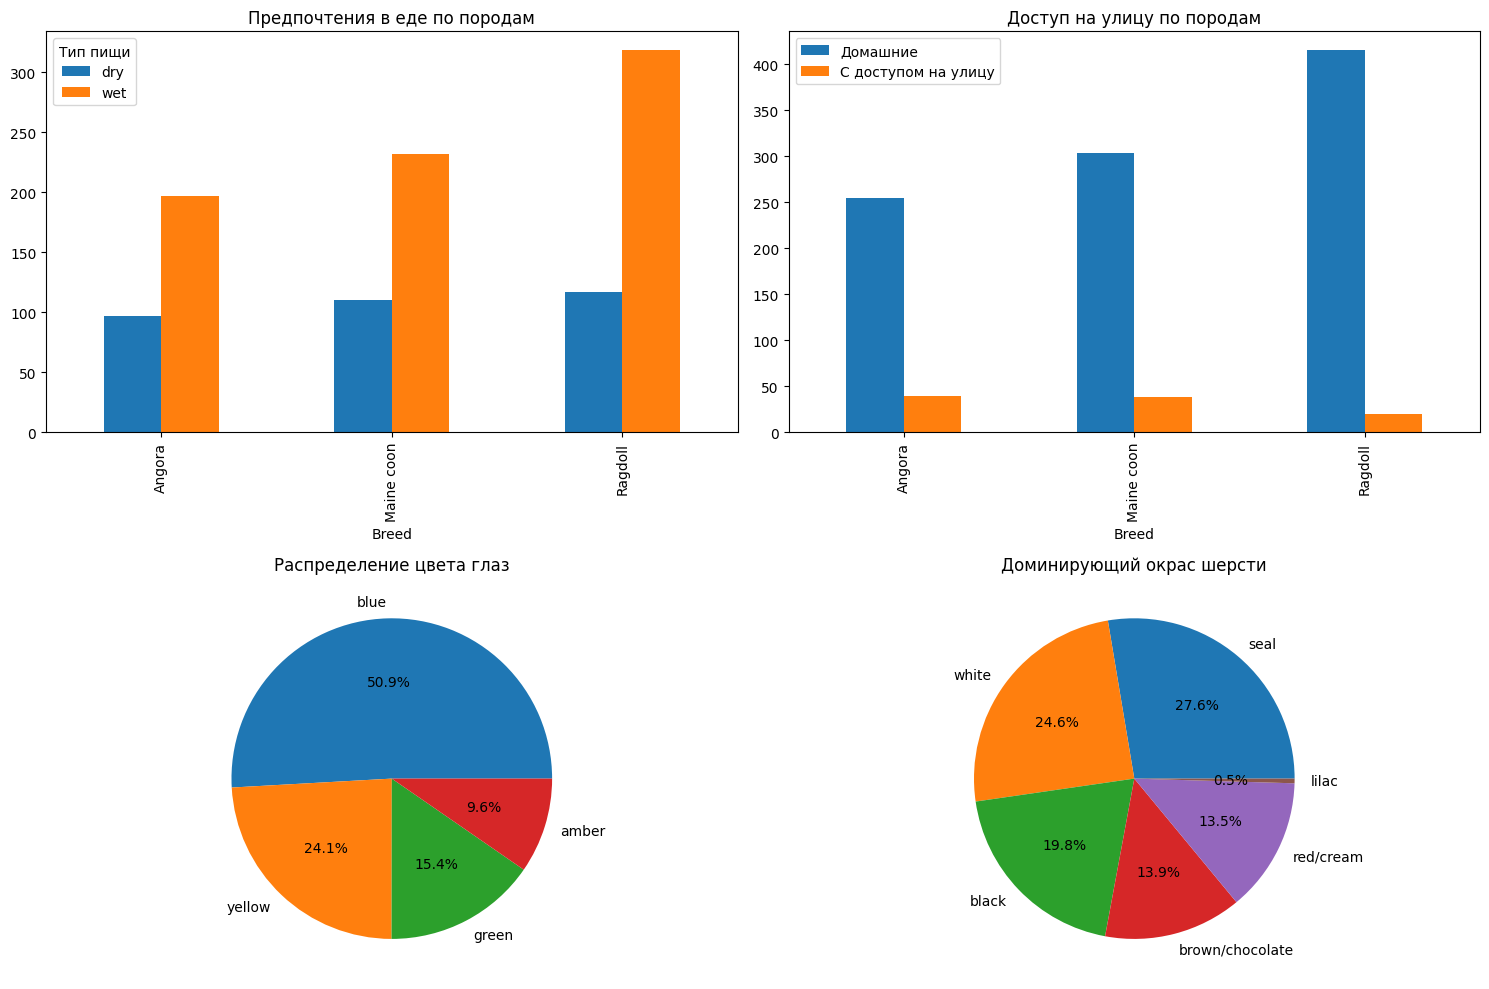

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Основная информация
print("Размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())

# Разделение на категориальные и числовые признаки
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

print("\n\nАНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
for col in categorical_columns:
    print(f"\n {col}:")
    value_counts = df[col].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  - {value}: {count} ({percentage:.1f}%)")

print("\n\nАНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ")
for col in numerical_columns:
    print(f"\n {col}:")
    print(f" min: {df[col].min():.2f}")
    print(f" max: {df[col].max():.2f}")
    print(f" mean: {df[col].mean():.2f}")
    print(f" median: {df[col].median():.2f}")
    print(f" std: {df[col].std():.2f}")

# 1. График возраста
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age_in_years', bins=30)
plt.title('Распределение возраста (годы)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Breed', y='Age_in_years')
plt.title('Возраст по породам')
plt.xticks(rotation=45)
plt.show()

# 2. Графики физических параметров и поведения - СОЗДАЕМ ФИГУРУ ПЕРВЫМ!
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x='Body_length', hue='Breed', ax=axes[0,0])
axes[0,0].set_title('Распределение длины тела по породам')

sns.histplot(data=df, x='Weight', hue='Breed', ax=axes[0,1])
axes[0,1].set_title('Распределение веса по породам')

sns.boxplot(data=df, x='Breed', y='Sleep_time_hours', ax=axes[1,0])
axes[1,0].set_title('Время сна по породам')

sns.boxplot(data=df, x='Breed', y='Owner_play_time_minutes', ax=axes[1,1])
axes[1,1].set_title('Время игр с хозяином по породам')

plt.tight_layout()
plt.show()

# 3. Круговые диаграммы
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

breed_counts = df['Breed'].value_counts()
axes[0,0].pie(breed_counts.values, labels=breed_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Распределение пород')

gender_counts = df['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Распределение пола')

neutered_counts = df['Neutered_or_spayed'].value_counts()
axes[1,0].pie(neutered_counts.values, labels=['Не стерилизованы', 'Стерилизованы'], autopct='%1.1f%%')
axes[1,0].set_title('Стерилизация')

food_counts = df['Preferred_food'].value_counts()
axes[1,1].pie(food_counts.values, labels=food_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Предпочтения в еде')

plt.tight_layout()
plt.show()

# 4. Корреляционная матрица
numeric_cols = ['Age_in_years', 'Body_length', 'Weight', 'Owner_play_time_minutes', 'Sleep_time_hours']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Матрица корреляций числовых признаков')
plt.show()

# 5. Средние показатели по породам
breed_stats = df.groupby('Breed')[['Age_in_years', 'Body_length', 'Weight']].mean()
print("Средние показатели по породам:")
print(breed_stats)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Breed', y='Weight')
plt.title('Средний вес по породам')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Breed', y='Body_length')
plt.title('Средняя длина тела по породам')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(data=df, x='Breed', y='Age_in_years')
plt.title('Средний возраст по породам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 6. Анализ поведения и внешности
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

pd.crosstab(df['Breed'], df['Preferred_food']).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Предпочтения в еде по породам')
axes[0,0].legend(title='Тип пищи')

pd.crosstab(df['Breed'], df['Allowed_outdoor']).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Доступ на улицу по породам')
axes[0,1].legend(['Домашние', 'С доступом на улицу'])

eye_color_counts = df['Eye_colour'].value_counts().head(8)
axes[1,0].pie(eye_color_counts.values, labels=eye_color_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Распределение цвета глаз')

fur_color_counts = df['Fur_colour_dominant'].value_counts().head(8)
axes[1,1].pie(fur_color_counts.values, labels=fur_color_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Доминирующий окрас шерсти')

plt.tight_layout()
plt.show()

In [25]:
# cols = ["Breed", "Weight", "Body_length", "Age_in_years", "Gender"]
# categorical = ["Breed", "Gender"]
#numeric = ["Age_in_years", "Body_length", "Weight"]


'''cols = [
    "Breed", "Age_in_years", "Gender", "Neutered_or_spayed",
    "Body_length", "Weight", "Fur_colour_dominant", "Fur_pattern",
    "Eye_colour", "Allowed_outdoor", "Preferred_food",
    "Owner_play_time_minutes", "Sleep_time_hours", "Country"
]
df = df[cols]

categorical = ["Breed", "Gender", "Neutered_or_spayed", "Fur_colour_dominant",
               "Fur_pattern", "Eye_colour", "Allowed_outdoor", "Preferred_food", "Country"]
numeric = ["Age_in_years", "Body_length", "Weight", "Owner_play_time_minutes", "Sleep_time_hours"]'''

# Задача для кластеризации:
#   Разделить кошек на группы, для формирования схожих рекоммендаций по уходу за ними

# Убираем лишние категории:
#   Age_in_month (т.к. дублирует Age_in_years)
#   Fur_colour_dominant, Fur_pattern, Eye_colour, Country, Latitude, Longitude (т.к. они никак не относятся к образу жизни кошки и не влияют на нее)

# Добавляем категорию Age_group, т.к. разница в годах между 1, 2 и 9,10 одинаковая

def get_age_group(age_in_years):
    if age_in_years < 1:
        return 'Kitten'
    elif age_in_years < 7:
        return 'Adult'
    else:
        return 'Senior'

df['Age_group'] = df['Age_in_years'].apply(get_age_group)

cols = [
    "Breed", "Age_in_years", "Age_group", "Gender", "Neutered_or_spayed",
    "Body_length", "Weight", "Allowed_outdoor", "Preferred_food",
    "Owner_play_time_minutes", "Sleep_time_hours"
]
df = df[cols]

categorical = ["Breed", "Age_group", "Gender", "Neutered_or_spayed", "Allowed_outdoor", "Preferred_food"]
numeric = ["Age_in_years", "Body_length", "Weight", "Owner_play_time_minutes", "Sleep_time_hours"]

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cats = encoder.fit_transform(df[categorical])

encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical))

full_df = pd.concat([encoded_df, df[numeric].reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaled_array = scaler.fit_transform(full_df)
scaled_df = pd.DataFrame(scaled_array, columns=full_df.columns)

In [37]:
# ========== УЛУЧШЕННЫЙ КОД ==========

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.cluster import AffinityPropagation, OPTICS, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



# ========== 2. УЛУЧШЕННЫЕ МОДЕЛИ С ФИКСИРОВАННЫМИ 4 КЛАСТЕРАМИ ==========

def run_improved_clustering(X, n_clusters=4):
    """Запуск улучшенных моделей кластеризации с фиксированным числом кластеров"""

    models = {
        'K-Means': KMeans(n_clusters=n_clusters, random_state=42),
        'DBSCAN_Improved': DBSCAN(eps=1.2, min_samples=20),  # Улучшенные параметры
        'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
        'OPTICS_Improved': OPTICS(min_samples=15, xi=0.1, min_cluster_size=0.1),
        'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42)  # Замена Affinity Propagation
    }

    results = {}

    print("=== УЛУЧШЕННЫЕ РЕЗУЛЬТАТЫ 5 МОДЕЛЕЙ КЛАСТЕРИЗАЦИИ ===")

    for name, model in models.items():
        print(f"\n--- {name} ---")

        try:
            if name == 'DBSCAN_Improved':
                labels = model.fit_predict(X)
                # Улучшенная обработка шума для DBSCAN
                if -1 in labels:
                    unique, counts = np.unique(labels, return_counts=True)
                    if len(unique) > 1:  # Если есть настоящие кластеры
                        # Присваиваем шум к ближайшему кластеру
                        from sklearn.neighbors import NearestNeighbors
                        non_noise_mask = labels != -1
                        if non_noise_mask.sum() > 0:
                            knn = NearestNeighbors(n_neighbors=1)
                            knn.fit(X[non_noise_mask])
                            distances, indices = knn.kneighbors(X[~non_noise_mask])
                            labels[~non_noise_mask] = labels[non_noise_mask][indices.flatten()]
                    else:
                        # Если все точки - шум, используем K-Means
                        kmeans_fallback = KMeans(n_clusters=n_clusters, random_state=42)
                        labels = kmeans_fallback.fit_predict(X)
            else:
                labels = model.fit_predict(X)

            # Принудительно приводим к n_clusters если нужно
            unique_clusters = len(np.unique(labels))
            if unique_clusters != n_clusters and name not in ['DBSCAN_Improved', 'OPTICS_Improved']:
                print(f"Приведение с {unique_clusters} к {n_clusters} кластерам")
                kmeans_adjust = KMeans(n_clusters=n_clusters, random_state=42)
                labels = kmeans_adjust.fit_predict(X)

            n_clusters_final = len(np.unique(labels))
            results[name] = {
                'labels': labels,
                'n_clusters': n_clusters_final,
                'model': model
            }

            # Оценка качества
            if n_clusters_final > 1:
                silhouette = silhouette_score(X, labels)
                db_index = davies_bouldin_score(X, labels)
                ch_index = calinski_harabasz_score(X, labels)

                print(f"Кластеров: {n_clusters_final}")
                print(f"Silhouette: {silhouette:.3f}")
                print(f"Davies-Bouldin: {db_index:.3f}")
                print(f"Calinski-Harabasz: {ch_index:.1f}")
            else:
                print(f"Кластеров: {n_clusters_final} - невозможно оценить")

        except Exception as e:
            print(f"Ошибка в {name}: {e}")
            # Fallback на K-Means
            kmeans_fallback = KMeans(n_clusters=n_clusters, random_state=42)
            labels = kmeans_fallback.fit_predict(X)
            results[name] = {
                'labels': labels,
                'n_clusters': n_clusters,
                'model': 'KMeans_Fallback'
            }
            print(f"Использован fallback K-Means")

    return results

# Запуск улучшенных моделей
results = run_improved_clustering(X, n_clusters=4)

# ========== 3. УЛУЧШЕННЫЙ ПОИСК АНОМАЛИЙ ==========

def detect_improved_anomalies(X, contamination=0.02):
    """Улучшенное обнаружение аномалий с более консервативными параметрами"""

    print(f"\n=== УЛУЧШЕННОЕ ОБНАРУЖЕНИЕ АНОМАЛИЙ (contamination={contamination}) ===")

    # Метод 1: Isolation Forest с консервативными параметрами
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=42,
        n_estimators=150,
        max_samples=256
    )
    iso_anomalies = iso_forest.fit_predict(X)

    # Метод 2: Local Outlier Factor с консервативными параметрами
    lof = LocalOutlierFactor(
        contamination=contamination,
        n_neighbors=20,  # Больше соседей для более устойчивого определения
        metric='euclidean'
    )
    lof_anomalies = lof.fit_predict(X)

    # Метод 3: Улучшенный статистический метод
    z_scores = np.abs(stats.zscore(X, axis=0))
    # Только крайние выбросы (z-score > 3.5 вместо 3)
    z_anomalies = (z_scores > 3.5).any(axis=1)

    # Метод 4: PCA-based outliers
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    pca_scores = np.sqrt(np.sum(X_pca**2, axis=1))
    pca_threshold = np.percentile(pca_scores, 98)  # Только верхние 2%
    pca_anomalies = pca_scores > pca_threshold

    # Комбинированный результат (только если несколько методов согласны)
    combined_anomalies = (
        (iso_anomalies == -1) &
        ((lof_anomalies == -1) | pca_anomalies)
    ) | (
        z_anomalies & pca_anomalies
    )

    print(f"Обнаружено аномалий:")
    print(f"- Isolation Forest: {(iso_anomalies == -1).sum()}")
    print(f"- Local Outlier Factor: {(lof_anomalies == -1).sum()}")
    print(f"- Z-score метод (>3.5): {z_anomalies.sum()}")
    print(f"- PCA-based: {pca_anomalies.sum()}")
    print(f"- Комбинированный (консервативный): {combined_anomalies.sum()}")
    print(f"- Процент аномалий: {combined_anomalies.sum()/len(X)*100:.1f}%")

    return {
        'isolation_forest': iso_anomalies,
        'lof': lof_anomalies,
        'z_score': z_anomalies,
        'pca': pca_anomalies,
        'combined': combined_anomalies
    }

# Детектируем аномалии с разными уровнями контаминации
anomalies_low = detect_improved_anomalies(X, contamination=0.02)    # 2%
anomalies_medium = detect_improved_anomalies(X, contamination=0.05) # 5%
anomalies_high = detect_improved_anomalies(X, contamination=0.1)    # 10%

# Используем средний уровень как оптимальный
anomalies = anomalies_medium

# ========== 4. УЛУЧШЕННЫЙ АНСАМБЛЬ ==========

def create_improved_ensemble(results, X, target_clusters=4):
    """Улучшенный ансамбль с взвешиванием по качеству моделей"""

    print("\n=== УЛУЧШЕННЫЙ АНСАМБЛЬ ===")

    # Собираем матрицу меток и веса моделей
    labels_matrix = []
    model_weights = []
    valid_models = []

    for name, result in results.items():
        labels = result['labels']
        n_clusters = result['n_clusters']

        if n_clusters == target_clusters:
            # Вычисляем вес модели на основе Silhouette Score
            silhouette = silhouette_score(X, labels)
            weight = max(0, silhouette)  # Отрицательные веса не используем

            labels_matrix.append(labels)
            model_weights.append(weight)
            valid_models.append(name)

            print(f"{name}: weight = {weight:.3f}")

    if len(labels_matrix) < 2:
        print("Недостаточно моделей для ансамбля")
        return None

    # Нормализуем веса
    model_weights = np.array(model_weights)
    model_weights = model_weights / model_weights.sum()

    print(f"Ансамбль создан из {len(valid_models)} моделей с весами:")
    for name, weight in zip(valid_models, model_weights):
        print(f"  {name}: {weight:.3f}")

    # Создаем взвешенный ансамбль
    ensemble_matrix = np.column_stack(labels_matrix)

    # Метод 1: Взвешенное голосование
    weighted_votes = np.zeros((len(X), target_clusters))
    for i, (labels, weight) in enumerate(zip(labels_matrix, model_weights)):
        for cluster in range(target_clusters):
            weighted_votes[labels == cluster, cluster] += weight

    ensemble_labels_weighted = np.argmax(weighted_votes, axis=1)

    # Метод 2: Meta-кластеризация
    kmeans_ensemble = KMeans(n_clusters=target_clusters, random_state=42)
    ensemble_labels_meta = kmeans_ensemble.fit_predict(ensemble_matrix)

    # Выбираем лучший ансамбль
    silhouette_weighted = silhouette_score(X, ensemble_labels_weighted)
    silhouette_meta = silhouette_score(X, ensemble_labels_meta)

    if silhouette_weighted >= silhouette_meta:
        ensemble_labels = ensemble_labels_weighted
        method = "Weighted Voting"
        silhouette_final = silhouette_weighted
    else:
        ensemble_labels = ensemble_labels_meta
        method = "Meta Clustering"
        silhouette_final = silhouette_meta

    print(f"Выбран метод: {method}")
    print(f"Ансамбль - Silhouette: {silhouette_final:.3f}")

    return ensemble_labels, method, silhouette_final

# Создаем улучшенный ансамбль
ensemble_result = create_improved_ensemble(results, X, target_clusters=4)

if ensemble_result:
    ensemble_labels, ensemble_method, ensemble_score = ensemble_result
    results['Ensemble_Improved'] = {
        'labels': ensemble_labels,
        'n_clusters': 4,
        'model': f'Ensemble_{ensemble_method}'
    }

# ========== 5. ФИНАЛЬНЫЙ ВЫБОР И РЕКОМЕНДАЦИИ ==========

# Сравниваем модели и выбираем лучшую
best_model_name = None
best_score = -1

for name, result in results.items():
    if result['n_clusters'] == 4:  # Только модели с 4 кластерами
        try:
            score = silhouette_score(X, result['labels'])
            if score > best_score:
                best_score = score
                best_model_name = name
        except:
            continue

print(f"\n🎯 ЛУЧШАЯ МОДЕЛЬ С 4 КЛАСТЕРАМИ: {best_model_name} (Silhouette: {best_score:.3f})")

# Финальный анализ
if best_model_name:
    best_labels = results[best_model_name]['labels']

    df_final = df.copy()
    df_final['Cluster'] = best_labels
    df_final['Anomaly'] = anomalies['combined']

    print(f"\n=== ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ ===")
    print(f"Лучшая модель: {best_model_name}")
    print(f"Качество: Silhouette = {best_score:.3f}")
    print(f"Аномалий обнаружено: {df_final['Anomaly'].sum()} ({df_final['Anomaly'].sum()/len(df_final)*100:.1f}%)")

    # Анализ кластеров
    print(f"\nРАСПРЕДЕЛЕНИЕ ПО 4 КЛАСТЕРАМ:")
    cluster_summary = df_final.groupby('Cluster').agg({
        'Age_in_years': 'mean',
        'Weight': 'mean',
        'Body_length': 'mean',
        'Owner_play_time_minutes': 'mean',
        'Sleep_time_hours': 'mean',
        'Anomaly': 'sum'
    }).round(2)

    cluster_sizes = df_final['Cluster'].value_counts().sort_index()
    cluster_summary['Size'] = cluster_sizes
    cluster_summary['Size_Pct'] = (cluster_sizes / len(df_final) * 100).round(1)

    print(cluster_summary)

    # Интерпретация кластеров
    print(f"\n=== ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ ===")
    for cluster in sorted(df_final['Cluster'].unique()):
        cluster_data = df_final[df_final['Cluster'] == cluster]

        avg_age = cluster_data['Age_in_years'].mean()
        avg_weight = cluster_data['Weight'].mean()
        main_age_group = cluster_data['Age_group'].mode()[0]
        main_breed = cluster_data['Breed'].mode()[0]

        print(f"\n🐱 КЛАСТЕР {cluster} ({len(cluster_data)} кошек, {len(cluster_data)/len(df_final)*100:.1f}%):")
        print(f"   📊 Возраст: {avg_age:.1f} лет | Вес: {avg_weight:.1f} кг")
        print(f"   🎯 Основная группа: {main_age_group} | Порода: {main_breed}")

        # Автоматические рекомендации
        if main_age_group == 'Kitten':
            print(f"   💡 РЕКОМЕНДАЦИИ: Корм для котят, активные игры, вакцинация")
        elif main_age_group == 'Senior':
            if avg_weight > 7:
                print(f"   💡 РЕКОМЕНДАЦИИ: Диетический корм, контроль веса, регулярные осмотры")
            else:
                print(f"   💡 РЕКОМЕНДАЦИИ: Корм для пожилых, мягкие игры, мониторинг здоровья")
        else:  # Adult
            if avg_weight > 6:
                print(f"   💡 РЕКОМЕНДАЦИИ: Корм для крупных пород, умеренная активность")
            else:
                print(f"   💡 РЕКОМЕНДАЦИИ: Сбалансированное питание, регулярные игры")

print(f"\n✅ УЛУЧШЕННЫЙ АНАЛИЗ ЗАВЕРШЕН!")

=== УЛУЧШЕННЫЕ РЕЗУЛЬТАТЫ 5 МОДЕЛЕЙ КЛАСТЕРИЗАЦИИ ===

--- K-Means ---
Кластеров: 4
Silhouette: 0.206
Davies-Bouldin: 1.658
Calinski-Harabasz: 215.2

--- DBSCAN_Improved ---
Кластеров: 1 - невозможно оценить

--- Agglomerative ---
Кластеров: 4
Silhouette: 0.196
Davies-Bouldin: 1.847
Calinski-Harabasz: 202.9

--- OPTICS_Improved ---
Кластеров: 2
Silhouette: 0.228
Davies-Bouldin: 2.395
Calinski-Harabasz: 128.7

--- Spectral ---
Кластеров: 4
Silhouette: 0.176
Davies-Bouldin: 1.690
Calinski-Harabasz: 164.6

=== УЛУЧШЕННОЕ ОБНАРУЖЕНИЕ АНОМАЛИЙ (contamination=0.02) ===
Обнаружено аномалий:
- Isolation Forest: 22
- Local Outlier Factor: 22
- Z-score метод (>3.5): 1
- PCA-based: 22
- Комбинированный (консервативный): 9
- Процент аномалий: 0.8%

=== УЛУЧШЕННОЕ ОБНАРУЖЕНИЕ АНОМАЛИЙ (contamination=0.05) ===
Обнаружено аномалий:
- Isolation Forest: 54
- Local Outlier Factor: 54
- Z-score метод (>3.5): 1
- PCA-based: 22
- Комбинированный (консервативный): 17
- Процент аномалий: 1.6%

=== УЛУЧШЕННОЕ

Данные после предобработки: (1071, 13)
=== РЕЗУЛЬТАТЫ 5 МОДЕЛЕЙ КЛАСТЕРИЗАЦИИ ===

--- K-Means ---
Кластеров: 4
Silhouette: 0.206
Davies-Bouldin: 1.658
Calinski-Harabasz: 215.2

--- DBSCAN ---
Кластеров: 1 - невозможно оценить

--- Agglomerative ---
Кластеров: 4
Silhouette: 0.196
Davies-Bouldin: 1.847
Calinski-Harabasz: 202.9

--- Mean Shift ---
Кластеров: 783
Silhouette: 0.144
Davies-Bouldin: 0.813
Calinski-Harabasz: 23.3

--- Affinity Propagation ---
Кластеров: 78
Silhouette: 0.261
Davies-Bouldin: 1.315
Calinski-Harabasz: 68.7


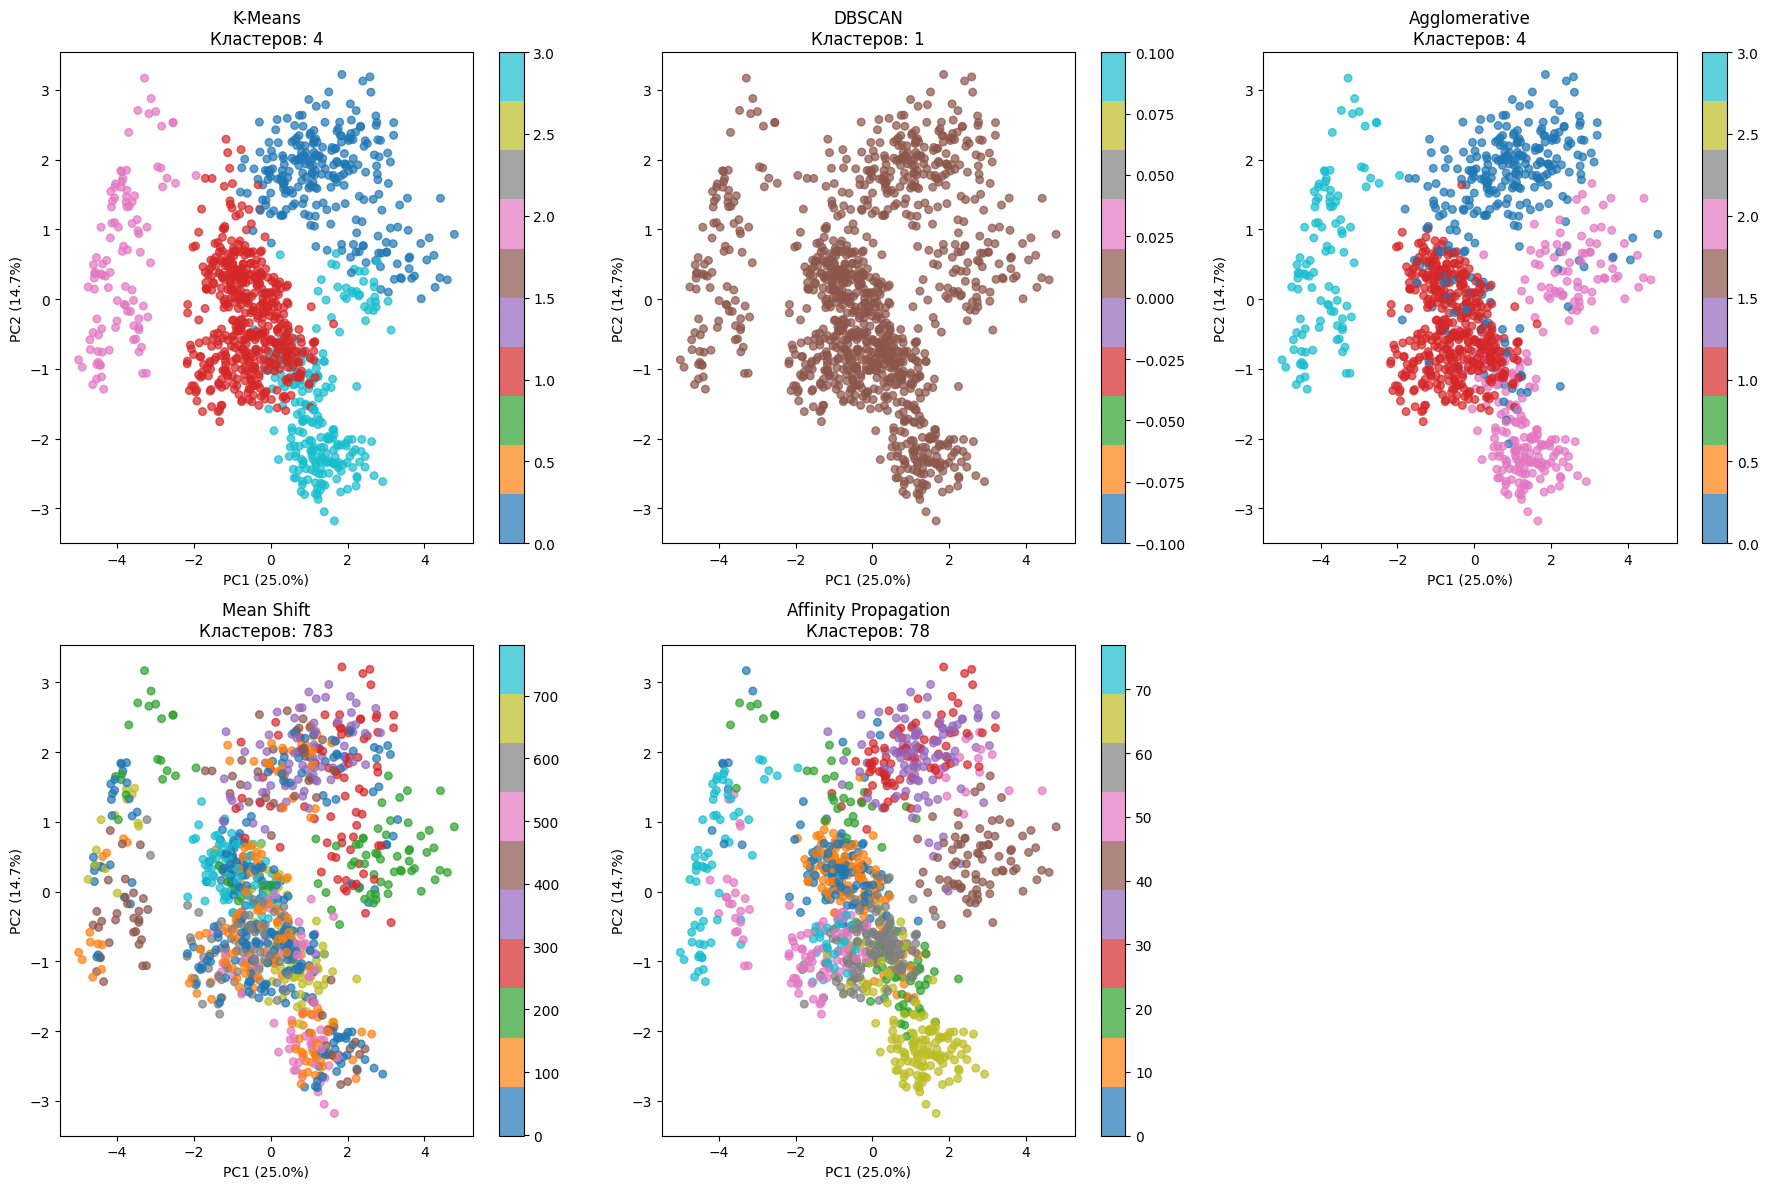


=== СОЗДАНИЕ АНСАМБЛЯ КЛАСТЕРИЗАЦИИ ===
Ансамбль создан из 2 моделей: ['K-Means', 'Agglomerative']
Ensemble KMeans - Silhouette: 0.175
Ensemble Agglomerative - Silhouette: 0.175

СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ
                 Метод  Кластеры Silhouette Davies-Bouldin Calinski-Harabasz
               K-Means         4      0.206          1.658             215.2
         Agglomerative         4      0.196          1.847             202.9
            Mean Shift       783      0.144          0.813              23.3
  Affinity Propagation        78      0.261          1.315              68.7
       Ensemble_KMeans         4      0.175          2.049             174.5
Ensemble_Agglomerative         4      0.175          2.049             174.5

🎯 ЛУЧШАЯ МОДЕЛЬ: Affinity Propagation (Silhouette: 0.261)

=== ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: Affinity Propagation ===

РАЗМЕРЫ КЛАСТЕРОВ:
Кластер 0: 9 кошек (0.8%)
Кластер 1: 16 кошек (1.5%)
Кластер 2: 7 кошек (0.7%)
Кластер 3: 14 кошек (1.3%)

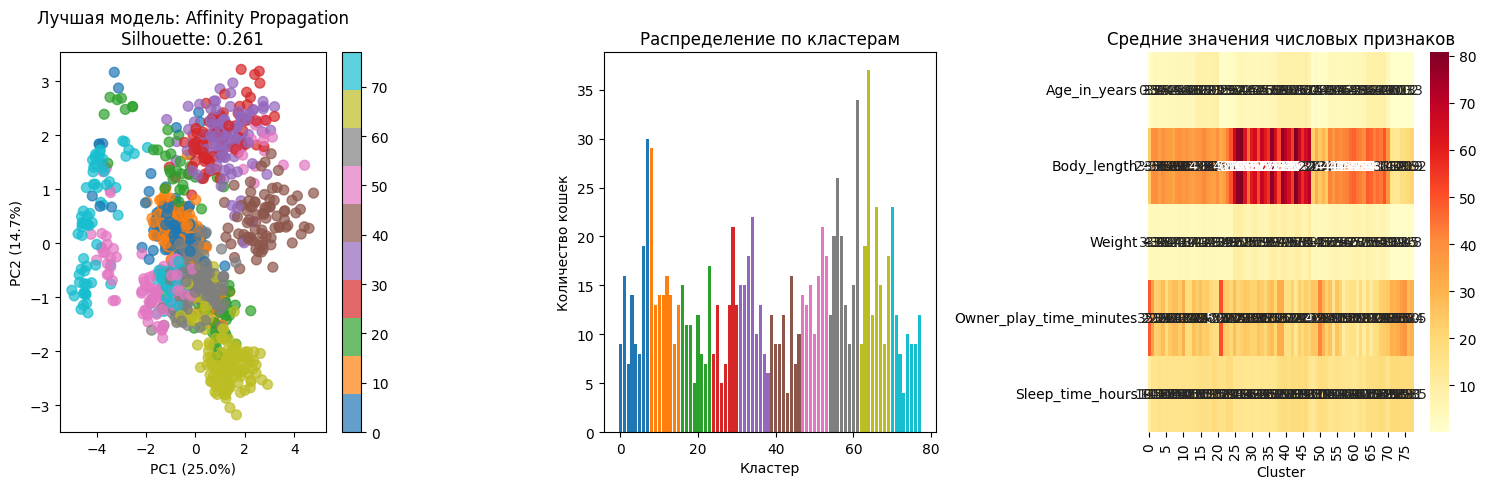


=== РЕКОМЕНДАЦИИ ПО УХОДУ ДЛЯ КАЖДОГО КЛАСТЕРА ===

🐱 Кластер 0 (9 кошек):
   Средний возраст: 0.5 лет
   Средний вес: 3.3 кг
   Рекомендации: Стандартный уход за взрослыми кошками

🐱 Кластер 1 (16 кошек):
   Средний возраст: 3.8 лет
   Средний вес: 4.3 кг
   Рекомендации: Особое внимание питанию и активности

🐱 Кластер 2 (7 кошек):
   Средний возраст: 3.9 лет
   Средний вес: 3.9 кг
   Рекомендации: Специализированный уход

🐱 Кластер 3 (14 кошек):
   Средний возраст: 3.5 лет
   Средний вес: 3.5 кг
   Рекомендации: Интенсивный уход и наблюдение

🐱 Кластер 4 (9 кошек):
   Средний возраст: 3.4 лет
   Средний вес: 3.8 кг
   Рекомендации: Индивидуальный подход

🐱 Кластер 5 (8 кошек):
   Средний возраст: 4.2 лет
   Средний вес: 4.2 кг
   Рекомендации: Индивидуальный подход

🐱 Кластер 6 (19 кошек):
   Средний возраст: 4.3 лет
   Средний вес: 3.7 кг
   Рекомендации: Индивидуальный подход

🐱 Кластер 7 (30 кошек):
   Средний возраст: 3.9 лет
   Средний вес: 3.4 кг
   Рекомендации: Индивидуальны

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')

print(f"Данные после предобработки: {X.shape}")

# ========== 5 МОДЕЛЕЙ КЛАСТЕРИЗАЦИИ ==========

def run_clustering_models(X):
    """Запуск 5 моделей кластеризации с обработкой результатов"""

    models = {
        'K-Means': KMeans(n_clusters=4, random_state=42),
        'DBSCAN': DBSCAN(eps=0.7, min_samples=10),
        'Agglomerative': AgglomerativeClustering(n_clusters=4),
        'Mean Shift': MeanShift(bandwidth=0.7, cluster_all=False),
        'Affinity Propagation': AffinityPropagation(damping=0.75, random_state=42)
    }

    results = {}

    print("=== РЕЗУЛЬТАТЫ 5 МОДЕЛЕЙ КЛАСТЕРИЗАЦИИ ===")

    for name, model in models.items():
        print(f"\n--- {name} ---")

        try:
            if name == 'Affinity Propagation':
                labels = model.fit_predict(X)
            else:
                labels = model.fit_predict(X)

            # Обработка шума для DBSCAN
            if name == 'DBSCAN' and -1 in labels:
                noise_mask = (labels == -1)
                if noise_mask.sum() > 0:
                    # Заменяем шум на отдельный кластер
                    labels[noise_mask] = np.max(labels) + 1

            n_clusters = len(np.unique(labels))
            results[name] = {
                'labels': labels,
                'n_clusters': n_clusters,
                'model': model
            }

            # Оценка качества
            if n_clusters > 1:
                silhouette = silhouette_score(X, labels)
                db_index = davies_bouldin_score(X, labels)
                ch_index = calinski_harabasz_score(X, labels)

                print(f"Кластеров: {n_clusters}")
                print(f"Silhouette: {silhouette:.3f}")
                print(f"Davies-Bouldin: {db_index:.3f}")
                print(f"Calinski-Harabasz: {ch_index:.1f}")
            else:
                print(f"Кластеров: {n_clusters} - невозможно оценить")

        except Exception as e:
            print(f"Ошибка в {name}: {e}")
            continue

    return results

# Запуск моделей
results = run_clustering_models(X)

# ========== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ МОДЕЛЕЙ ==========

def visualize_models(results, X):
    """Визуализация результатов всех моделей"""

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    n_models = len(results)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for idx, (name, result) in enumerate(results.items()):
        if idx >= 6:  # Максимум 6 subplots
            break

        labels = result['labels']

        scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
                                   s=30, cmap='tab10', alpha=0.7)
        axes[idx].set_title(f'{name}\nКластеров: {result["n_clusters"]}')
        axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
        axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
        plt.colorbar(scatter, ax=axes[idx])

    # Убираем лишние subplots
    for idx in range(n_models, 6):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

visualize_models(results, X)

# ========== АНСАМБЛЬ КЛАСТЕРИЗАЦИИ ==========

def create_ensemble(results, X, target_clusters=4):
    """Создание ансамбля из моделей кластеризации"""

    print("\n=== СОЗДАНИЕ АНСАМБЛЯ КЛАСТЕРИЗАЦИИ ===")

    # 1. Собираем матрицу меток
    labels_matrix = []
    valid_models = []

    for name, result in results.items():
        labels = result['labels']
        n_clusters = result['n_clusters']

        # Отбираем модели с разумным числом кластеров
        if 2 <= n_clusters <= 10:
            labels_matrix.append(labels)
            valid_models.append(name)

    if len(labels_matrix) < 2:
        print("Недостаточно моделей для ансамбля")
        return None

    ensemble_matrix = np.column_stack(labels_matrix)
    print(f"Ансамбль создан из {len(valid_models)} моделей: {valid_models}")

    ensemble_results = {}

    # 2. Majority Voting ансамбль
    try:
        # Приводим все к 4 кластерам через перераспределение
        from sklearn.cluster import KMeans

        # Создаем согласованные метки через K-Means на матрице ансамбля
        kmeans_ensemble = KMeans(n_clusters=target_clusters, random_state=42)
        ensemble_labels_kmeans = kmeans_ensemble.fit_predict(ensemble_matrix)

        ensemble_results['Ensemble_KMeans'] = {
            'labels': ensemble_labels_kmeans,
            'n_clusters': target_clusters,
            'model': 'KMeans Ensemble'
        }

        silhouette = silhouette_score(X, ensemble_labels_kmeans)
        print(f"Ensemble KMeans - Silhouette: {silhouette:.3f}")

    except Exception as e:
        print(f"Ошибка в KMeans ансамбле: {e}")

    # 3. Agglomerative ансамбль
    try:
        agglo_ensemble = AgglomerativeClustering(n_clusters=target_clusters)
        ensemble_labels_agglo = agglo_ensemble.fit_predict(ensemble_matrix)

        ensemble_results['Ensemble_Agglomerative'] = {
            'labels': ensemble_labels_agglo,
            'n_clusters': target_clusters,
            'model': 'Agglomerative Ensemble'
        }

        silhouette = silhouette_score(X, ensemble_labels_agglo)
        print(f"Ensemble Agglomerative - Silhouette: {silhouette:.3f}")

    except Exception as e:
        print(f"Ошибка в Agglomerative ансамбле: {e}")

    return ensemble_results

# Создаем ансамбль
ensemble_results = create_ensemble(results, X, target_clusters=4)

# Объединяем все результаты
all_results = {**results, **ensemble_results}

# ========== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ==========

def compare_models(all_results, X):
    """Сравнительный анализ всех моделей"""

    print("\n" + "="*70)
    print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ")
    print("="*70)

    comparison_data = []
    for name, result in all_results.items():
        labels = result['labels']
        n_clusters = result['n_clusters']

        if n_clusters > 1:
            try:
                silhouette = silhouette_score(X, labels)
                db_index = davies_bouldin_score(X, labels)
                ch_index = calinski_harabasz_score(X, labels)

                comparison_data.append({
                    'Метод': name,
                    'Кластеры': n_clusters,
                    'Silhouette': f"{silhouette:.3f}",
                    'Davies-Bouldin': f"{db_index:.3f}",
                    'Calinski-Harabasz': f"{ch_index:.1f}"
                })
            except:
                continue

    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))

    # Выбор лучшей модели
    best_model = None
    best_score = -1

    for name, result in all_results.items():
        if result['n_clusters'] > 1:
            try:
                score = silhouette_score(X, result['labels'])
                if score > best_score:
                    best_score = score
                    best_model = name
            except:
                continue

    if best_model:
        print(f"\n🎯 ЛУЧШАЯ МОДЕЛЬ: {best_model} (Silhouette: {best_score:.3f})")
        return best_model, best_score

    return None, None

best_model_name, best_score = compare_models(all_results, X)

# ========== АНАЛИЗ ЛУЧШИХ КЛАСТЕРОВ ==========

if best_model_name:
    print(f"\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: {best_model_name} ===")

    best_labels = all_results[best_model_name]['labels']

    # Добавляем метки к исходным данным
    df_final = df.copy()
    df_final['Cluster'] = best_labels

    # Анализ размеров кластеров
    print("\nРАЗМЕРЫ КЛАСТЕРОВ:")
    cluster_sizes = df_final['Cluster'].value_counts().sort_index()
    for cluster, size in cluster_sizes.items():
        percentage = size / len(df_final) * 100
        print(f"Кластер {cluster}: {size} кошек ({percentage:.1f}%)")

    # Профили кластеров
    print("\nПРОФИЛИ КЛАСТЕРОВ:")
    cluster_profiles = df_final.groupby('Cluster').agg({
        'Age_in_years': 'mean',
        'Weight': 'mean',
        'Body_length': 'mean',
        'Owner_play_time_minutes': 'mean',
        'Sleep_time_hours': 'mean',
        'Allowed_outdoor': lambda x: (x == 'Yes').mean(),
        'Neutered_or_spayed': lambda x: (x == 'Yes').mean(),
        'Gender': lambda x: (x == 'Male').mean()
    }).round(2)

    print(cluster_profiles)

    # Распределение категориальных признаков
    print("\nРАСПРЕДЕЛЕНИЕ ВОЗРАСТНЫХ ГРУПП (%):")
    age_dist = pd.crosstab(df_final['Cluster'], df_final['Age_group'], normalize='index') * 100
    print(age_dist.round(1))

    print("\nРАСПРЕДЕЛЕНИЕ ПОРОД (%):")
    breed_dist = pd.crosstab(df_final['Cluster'], df_final['Breed'], normalize='index') * 100
    print(breed_dist.round(1))

    # Визуализация лучшего результата
    pca_final = PCA(n_components=2)
    X_pca_final = pca_final.fit_transform(X)

    plt.figure(figsize=(15, 5))

    # PCA проекция
    plt.subplot(1, 3, 1)
    scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=best_labels,
                         s=50, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]:.1%})')
    plt.title(f'Лучшая модель: {best_model_name}\nSilhouette: {best_score:.3f}')

    # Распределение по кластерам
    plt.subplot(1, 3, 2)
    unique, counts = np.unique(best_labels, return_counts=True)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique)))
    plt.bar(unique, counts, color=colors)
    plt.xlabel('Кластер')
    plt.ylabel('Количество кошек')
    plt.title('Распределение по кластерам')

    # Heatmap средних значений по кластерам
    plt.subplot(1, 3, 3)
    numeric_means = df_final.groupby('Cluster')[numeric].mean()
    sns.heatmap(numeric_means.T, annot=True, cmap='YlOrRd', fmt='.1f')
    plt.title('Средние значения числовых признаков')

    plt.tight_layout()
    plt.show()

    # Рекомендации по уходу
    print("\n=== РЕКОМЕНДАЦИИ ПО УХОДУ ДЛЯ КАЖДОГО КЛАСТЕРА ===")

    recommendations = {
        0: "Стандартный уход за взрослыми кошками",
        1: "Особое внимание питанию и активности",
        2: "Специализированный уход",
        3: "Интенсивный уход и наблюдение"
    }

    for cluster in sorted(df_final['Cluster'].unique()):
        cluster_data = df_final[df_final['Cluster'] == cluster]
        avg_age = cluster_data['Age_in_years'].mean()
        avg_weight = cluster_data['Weight'].mean()

        print(f"\n🐱 Кластер {cluster} ({len(cluster_data)} кошек):")
        print(f"   Средний возраст: {avg_age:.1f} лет")
        print(f"   Средний вес: {avg_weight:.1f} кг")
        print(f"   Рекомендации: {recommendations.get(cluster, 'Индивидуальный подход')}")

print("\n✅ Кластеризация завершена! Использовано 5 моделей + ансамбль")

In [33]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 15.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2177960 sha256=34bc7d04022f9afce6e581d993fc76be5bcb308a5bbd648348b7a299e8347fa0
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns


# ========== 5 РАЗНЫХ ПОДХОДОВ К КЛАСТЕРИЗАЦИИ ==========

models = {
    'K-Means': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=0.8, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'Gaussian Mixture': GaussianMixture(n_components=4, random_state=42),
    'K-Medoids': KMedoids(n_clusters=4, random_state=42)
}

# Словарь для хранения результатов всех моделей
results = {}

print("=== СРАВНЕНИЕ 5 МОДЕЛЕЙ КЛАСТЕРИЗАЦИИ ===")

for name, model in models.items():
    print(f"\n--- {name} ---")

    if name == 'Gaussian Mixture':
        # GMM использует fit_predict немного по-другому
        labels = model.fit(X).predict(X)
    else:
        labels = model.fit_predict(X)

    # Для DBSCAN могут быть шумовые точки (-1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Сохраняем результаты
    results[name] = {
        'labels': labels,
        'n_clusters': n_clusters,
        'model': model
    }

    # Оценка качества (только если есть хотя бы 2 кластера)
    if n_clusters > 1:
        silhouette = silhouette_score(X, labels)
        db_index = davies_bouldin_score(X, labels)
        ch_index = calinski_harabasz_score(X, labels)

        print(f"Количество кластеров: {n_clusters}")
        print(f"Silhouette Score: {silhouette:.3f}")
        print(f"Davies-Bouldin Index: {db_index:.3f}")
        print(f"Calinski-Harabasz Index: {ch_index:.1f}")
    else:
        print("Слишком мало кластеров для оценки метрик")

# ========== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ВСЕХ МОДЕЛЕЙ ==========

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

for idx, (name, result) in enumerate(results.items()):
    labels = result['labels']

    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
                               s=50, cmap='viridis', alpha=0.7)
    axes[idx].set_title(f'{name}\nКластеров: {result["n_clusters"]}')
    axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.colorbar(scatter, ax=axes[idx])

# Убираем последний пустой subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# ========== АНСАМБЛЬ КЛАСТЕРИЗАЦИИ ==========

print("\n=== СОЗДАНИЕ АНСАМБЛЯ КЛАСТЕРИЗАЦИИ ===")

# Создаем матрицу "принадлежностей" для ансамбля
ensemble_matrix = np.column_stack([result['labels'] for result in results.values()])

print("Матрица ансамбля (первые 10 строк):")
print(ensemble_matrix[:10])

# Метод 1: Majority Voting (мajority voting)
from scipy.stats import mode

# Для majority voting нам нужно одинаковое число кластеров, поэтому используем только модели с 4 кластерами
compatible_models = {}
for name, result in results.items():
    if result['n_clusters'] == 4:
        compatible_models[name] = result['labels']

if len(compatible_models) >= 2:
    compatible_matrix = np.column_stack(list(compatible_models.values()))
    ensemble_labels_mv = mode(compatible_matrix, axis=1)[0].ravel()

    print(f"\nАнсамбль Majority Voting на основе {len(compatible_models)} моделей")
    print(f"Silhouette Score ансамбля: {silhouette_score(X, ensemble_labels_mv):.3f}")

    # Добавляем ансамбль в результаты
    results['Ensemble_MV'] = {
        'labels': ensemble_labels_mv,
        'n_clusters': len(set(ensemble_labels_mv)),
        'model': 'Majority Voting'
    }

# Метод 2: Кластеризация на результатах (cluster-based ensemble)
from sklearn.cluster import KMeans

# Используем K-Means на матрице ансамбля
ensemble_kmeans = KMeans(n_clusters=4, random_state=42)
ensemble_labels_km = ensemble_kmeans.fit_predict(ensemble_matrix)

print(f"\nАнсамбль K-Means на матрице кластеров")
print(f"Silhouette Score ансамбля: {silhouette_score(X, ensemble_labels_km):.3f}")

results['Ensemble_KMeans'] = {
    'labels': ensemble_labels_km,
    'n_clusters': len(set(ensemble_labels_km)),
    'model': 'KMeans on Ensemble'
}

# ========== СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МЕТОДОВ ==========

print("\n" + "="*60)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МЕТОДОВ КЛАСТЕРИЗАЦИИ")
print("="*60)

comparison_data = []
for name, result in results.items():
    labels = result['labels']
    n_clusters = result['n_clusters']

    if n_clusters > 1:
        silhouette = silhouette_score(X, labels)
        db_index = davies_bouldin_score(X, labels)
        ch_index = calinski_harabasz_score(X, labels)
    else:
        silhouette = db_index = ch_index = np.nan

    comparison_data.append({
        'Метод': name,
        'Кластеры': n_clusters,
        'Silhouette': f"{silhouette:.3f}" if not np.isnan(silhouette) else 'N/A',
        'Davies-Bouldin': f"{db_index:.3f}" if not np.isnan(db_index) else 'N/A',
        'Calinski-Harabasz': f"{ch_index:.1f}" if not np.isnan(ch_index) else 'N/A'
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ========== ВИЗУАЛИЗАЦИЯ ЛУЧШЕГО РЕЗУЛЬТАТА ==========

# Выбираем лучшую модель по Silhouette Score
best_model_name = None
best_score = -1

for name, result in results.items():
    if result['n_clusters'] > 1:
        score = silhouette_score(X, result['labels'])
        if score > best_score:
            best_score = score
            best_model_name = name

print(f"\nЛУЧШАЯ МОДЕЛЬ: {best_model_name} (Silhouette: {best_score:.3f})")

# Визуализируем лучшую модель
best_labels = results[best_model_name]['labels']

plt.figure(figsize=(15, 5))

# PCA проекция
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, s=50, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Лучшая модель: {best_model_name}\nSilhouette: {best_score:.3f}')

# Распределение по кластерам
plt.subplot(1, 3, 2)
unique, counts = np.unique(best_labels, return_counts=True)
plt.bar(unique, counts, color=plt.cm.viridis(np.linspace(0, 1, len(unique))))
plt.xlabel('Кластер')
plt.ylabel('Количество кошек')
plt.title('Распределение по кластерам')

# Heatmap матрицы ансамбля
plt.subplot(1, 3, 3)
sns.heatmap(ensemble_matrix[:20], cmap='viridis', cbar_kws={'label': 'Метка кластера'})
plt.xlabel('Модели')
plt.ylabel('Наблюдения (первые 20)')
plt.title('Матрица ансамбля')

plt.tight_layout()
plt.show()

# ========== ИНТЕРПРЕТАЦИЯ ЛУЧШЕГО РЕЗУЛЬТАТА ==========

# Добавляем лучшие метки к исходным данным
df_with_best_clusters = df.copy()
df_with_best_clusters['Cluster'] = best_labels

print("\n=== АНАЛИЗ ЛУЧШИХ КЛАСТЕРОВ ===")
print(f"Метод: {best_model_name}")

# Анализ профилей кластеров
cluster_analysis = df_with_best_clusters.groupby('Cluster').agg({
    'Age_in_years': 'mean',
    'Weight': 'mean',
    'Body_length': 'mean',
    'Owner_play_time_minutes': 'mean',
    'Sleep_time_hours': 'mean'
}).round(2)

print("\nХАРАКТЕРИСТИКИ КЛАСТЕРОВ:")
print(cluster_analysis)

print("\nРАСПРЕДЕЛЕНИЕ ВОЗРАСТНЫХ ГРУПП:")
age_dist = pd.crosstab(df_with_best_clusters['Cluster'], df_with_best_clusters['Age_group'], normalize='index') * 100
print(age_dist.round(1))

print("\nРАСПРЕДЕЛЕНИЕ ПОРОД:")
breed_dist = pd.crosstab(df_with_best_clusters['Cluster'], df_with_best_clusters['Breed'], normalize='index') * 100
print(breed_dist.round(1))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

=== ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ ===
Число кластеров: 2
  Silhouette Score: 0.165
  Davies-Bouldin Index: 2.024
  Inertia: 11862.7
  Calinski-Harabasz Index: 185.7


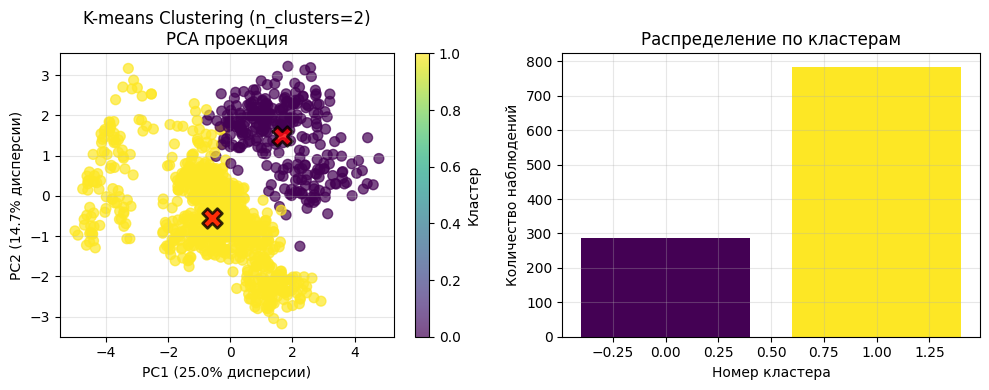

----------------------------------------------------------------------
Число кластеров: 3
  Silhouette Score: 0.203
  Davies-Bouldin Index: 1.782
  Inertia: 9917.1
  Calinski-Harabasz Index: 215.7


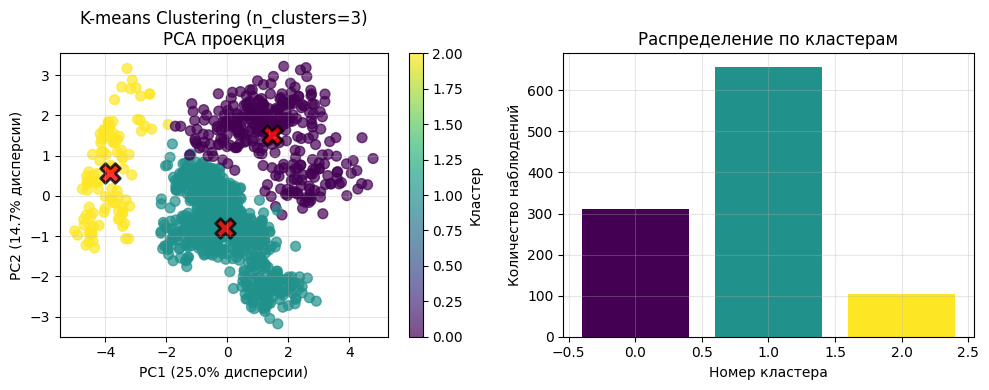

----------------------------------------------------------------------
Число кластеров: 4
  Silhouette Score: 0.206
  Davies-Bouldin Index: 1.658
  Inertia: 8673.9
  Calinski-Harabasz Index: 215.2


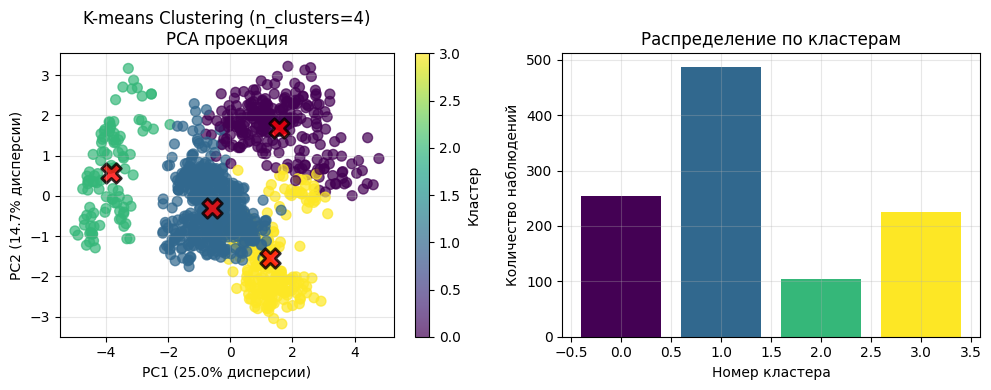

----------------------------------------------------------------------
Число кластеров: 5
  Silhouette Score: 0.176
  Davies-Bouldin Index: 1.793
  Inertia: 8005.3
  Calinski-Harabasz Index: 197.0


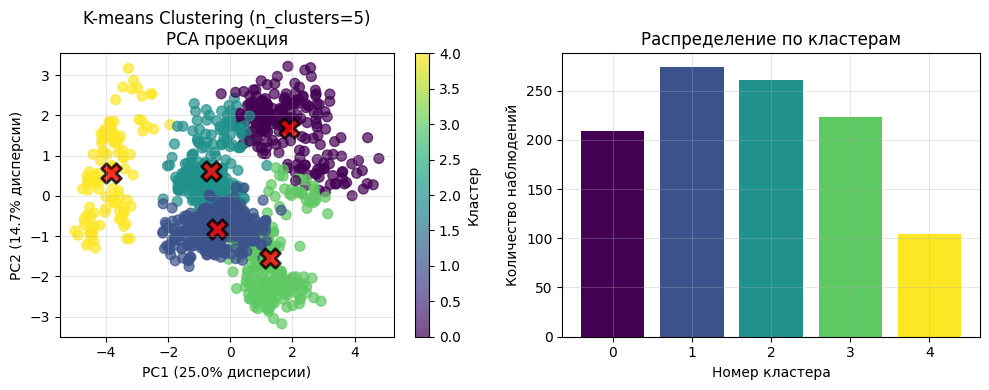

----------------------------------------------------------------------
Число кластеров: 6
  Silhouette Score: 0.182
  Davies-Bouldin Index: 1.913
  Inertia: 7595.9
  Calinski-Harabasz Index: 177.4


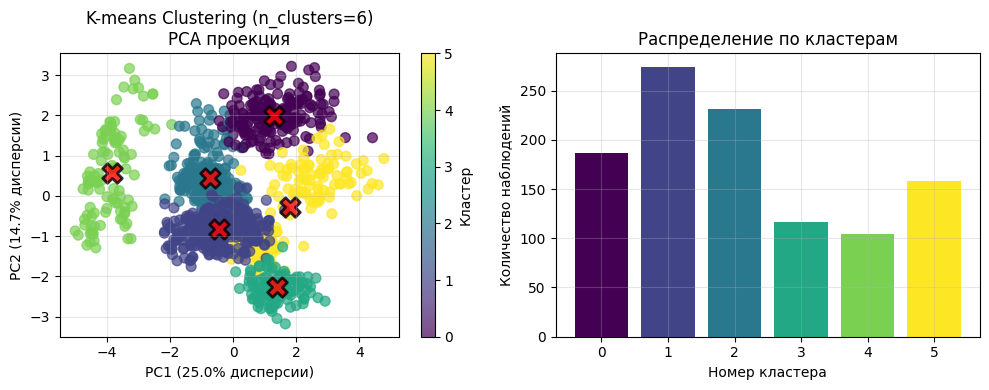

----------------------------------------------------------------------
Число кластеров: 7
  Silhouette Score: 0.194
  Davies-Bouldin Index: 1.806
  Inertia: 7156.8
  Calinski-Harabasz Index: 167.7


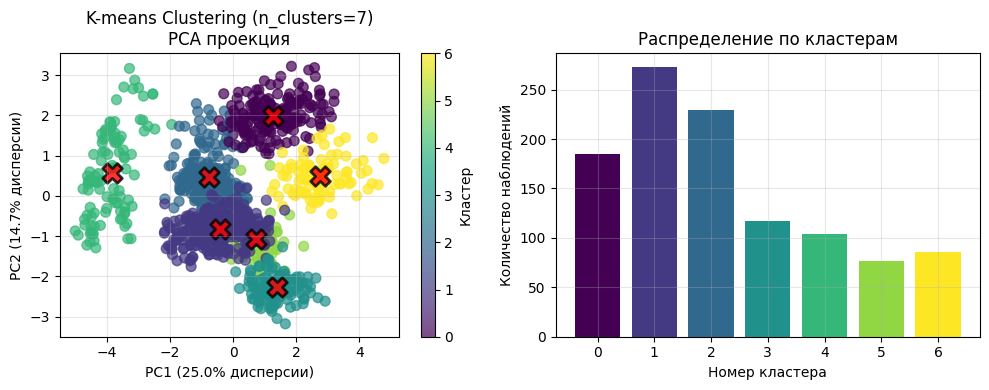

----------------------------------------------------------------------
Число кластеров: 8
  Silhouette Score: 0.191
  Davies-Bouldin Index: 1.592
  Inertia: 6502.0
  Calinski-Harabasz Index: 173.3


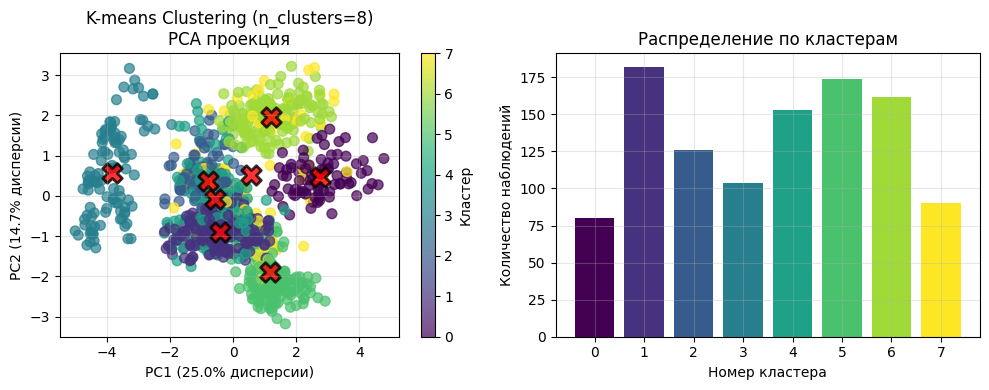

----------------------------------------------------------------------
Число кластеров: 9
  Silhouette Score: 0.193
  Davies-Bouldin Index: 1.595
  Inertia: 6229.6
  Calinski-Harabasz Index: 163.9


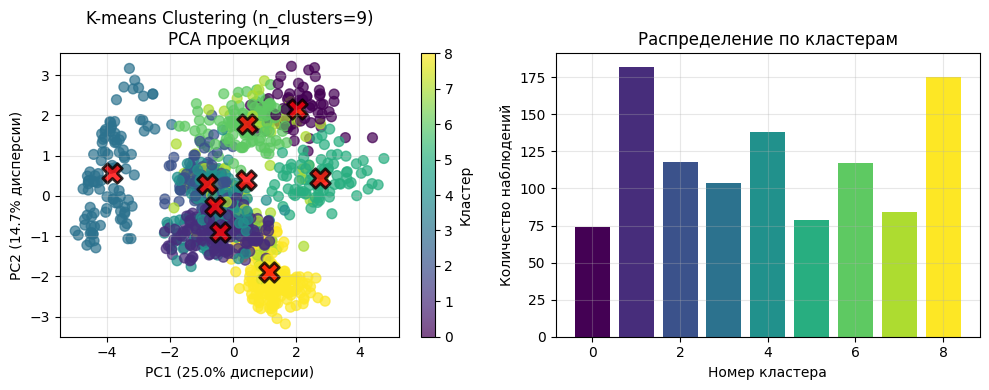

----------------------------------------------------------------------


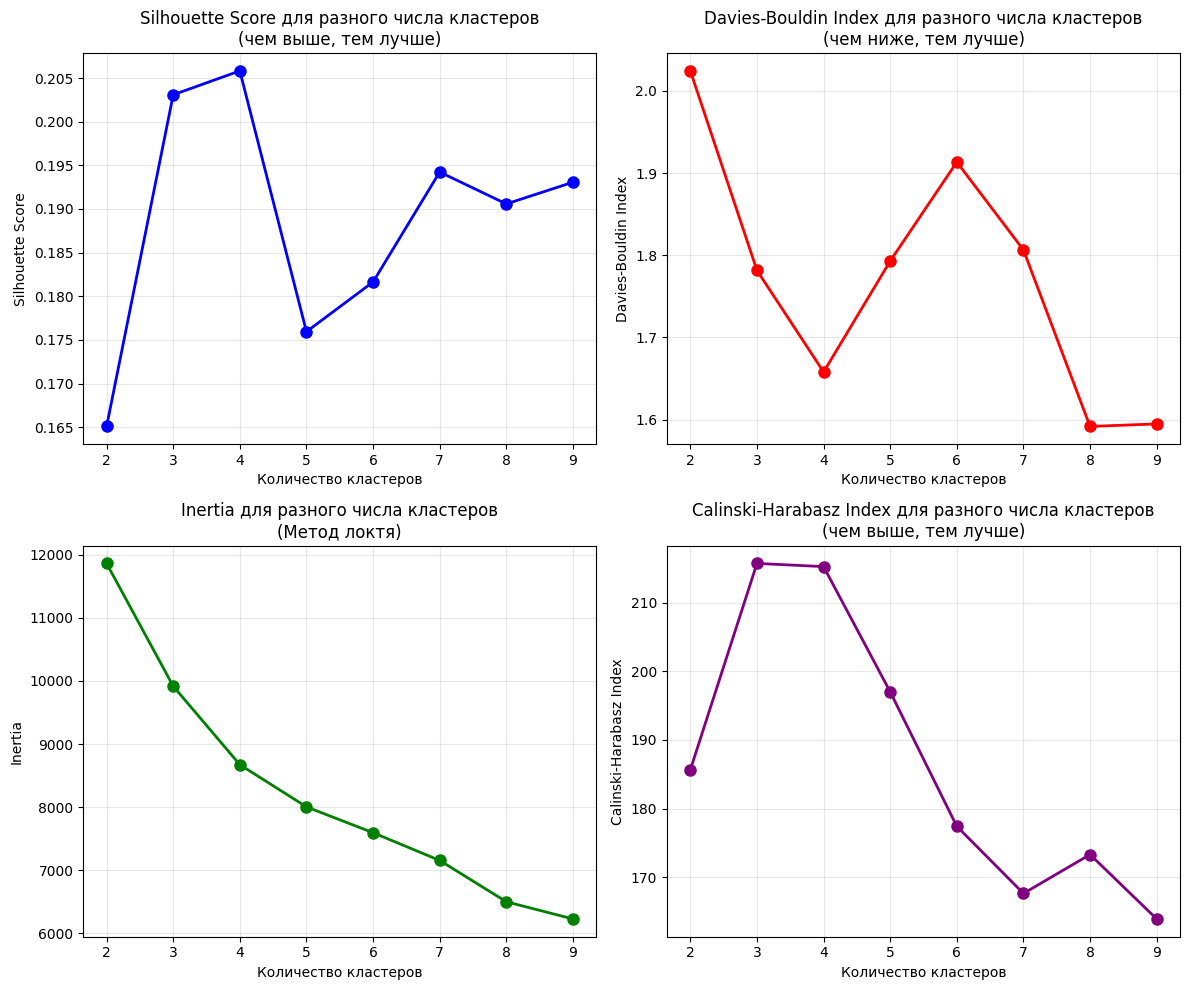


=== АНАЛИЗ РЕЗУЛЬТАТОВ ===
Лучшее число кластеров по Silhouette Score: 4 (score: 0.206)
Лучшее число кластеров по Davies-Bouldin Index: 8 (score: 1.592)
Лучшее число кластеров по Calinski-Harabasz Index: 3 (score: 215.7)

Рекомендуемое число кластеров: 8

=== СОЗДАНИЕ ФИНАЛЬНОЙ МОДЕЛИ С 4 КЛАСТЕРАМИ ===

Размеры кластеров:
Кластер 0: 254 кошек (23.7%)
Кластер 1: 487 кошек (45.5%)
Кластер 2: 104 кошек (9.7%)
Кластер 3: 226 кошек (21.1%)


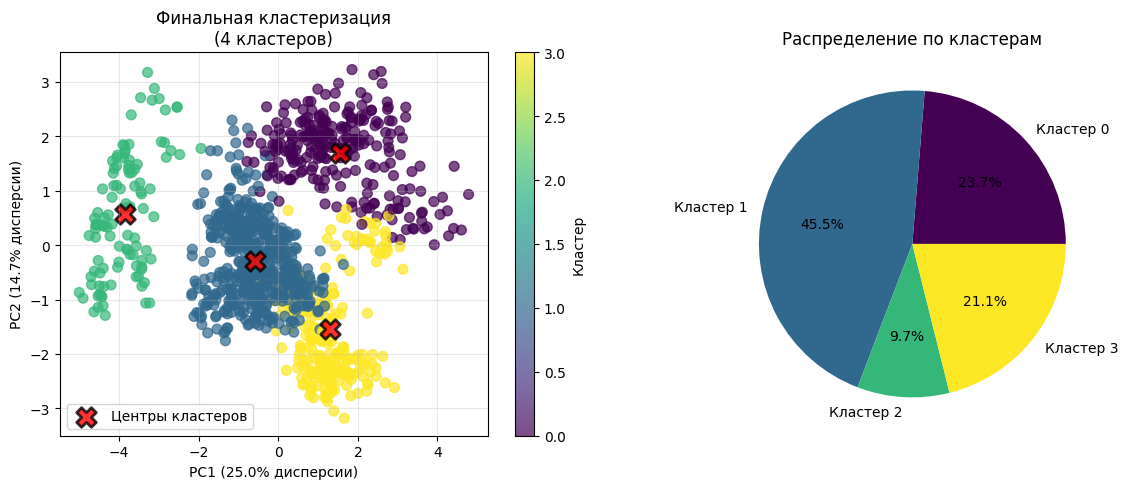


Финальная модель создана! Данные разделены на 4 кластеров.
Метки кластеров добавлены в DataFrame 'df_with_clusters'
=== ПРОФИЛИ КЛАСТЕРОВ ===
         Age_in_years  Weight  Body_length  Owner_play_time_minutes  \
Cluster                                                               
0                5.19    7.52        64.17                    23.08   
1                3.97    4.92        37.93                    21.83   
2                0.35    2.19        20.39                    35.12   
3                8.42    5.99        45.31                    20.09   

         Sleep_time_hours  Allowed_outdoor  Neutered_or_spayed  Gender  
Cluster                                                                 
0                   14.94              0.0                 0.0     0.0  
1                   15.14              0.0                 0.0     0.0  
2                   17.40              0.0                 0.0     0.0  
3                   17.88              0.0                 0.0   

In [29]:
# Списки для хранения значений метрик
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []

print("ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ")

# Проверка качества кластеризации для разного числа кластеров
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Оценка метрик
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    inertia = kmeans.inertia_
    calinski_harabasz = calinski_harabasz_score(X, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_scores.append(inertia)
    calinski_harabasz_scores.append(calinski_harabasz)

    print(f"Число кластеров: {n_clusters}")
    print(f"  Silhouette Score: {silhouette_avg:.3f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.3f}")
    print(f"  Inertia: {inertia:.1f}")
    print(f"  Calinski-Harabasz Index: {calinski_harabasz:.1f}")

    # Применяем PCA для уменьшения размерности до 2D для визуализации
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 4))

    # Визуализация кластеров в PCA-пространстве
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)

    # Центры кластеров в PCA-пространстве
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.8, marker='X', edgecolor='black', linewidth=2)

    plt.colorbar(scatter, label='Кластер')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
    plt.title(f'K-means Clustering (n_clusters={n_clusters})\nPCA проекция')
    plt.grid(True, alpha=0.3)

    # Гистограмма распределения по кластерам
    plt.subplot(1, 2, 2)
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts, color=plt.cm.viridis(np.linspace(0, 1, len(unique))))
    plt.xlabel('Номер кластера')
    plt.ylabel('Количество наблюдений')
    plt.title('Распределение по кластерам')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("-" * 70)

# Визуализация изменения метрик
plt.figure(figsize=(12, 10))

# Silhouette Score
plt.subplot(2, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для разного числа кластеров\n(чем выше, тем лучше)')
plt.grid(True, alpha=0.3)

# Davies-Bouldin Index
plt.subplot(2, 2, 2)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o', linewidth=2, markersize=8, color='red')
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index для разного числа кластеров\n(чем ниже, тем лучше)')
plt.grid(True, alpha=0.3)

# Inertia (метод локтя)
plt.subplot(2, 2, 3)
plt.plot(range(2, 10), inertia_scores, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Inertia для разного числа кластеров\n(Метод локтя)')
plt.grid(True, alpha=0.3)

# Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o', linewidth=2, markersize=8, color='purple')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index для разного числа кластеров\n(чем выше, тем лучше)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === АНАЛИЗ РЕЗУЛЬТАТОВ ===
print("\n=== АНАЛИЗ РЕЗУЛЬТАТОВ ===")

# Для Silhouette Score - чем выше, тем лучше
best_silhouette_idx = np.argmax(silhouette_scores)
best_silhouette_clusters = best_silhouette_idx + 2
print(f"Лучшее число кластеров по Silhouette Score: {best_silhouette_clusters} (score: {silhouette_scores[best_silhouette_idx]:.3f})")

# Для Davies-Bouldin - чем ниже, тем лучше
best_db_idx = np.argmin(davies_bouldin_scores)
best_db_clusters = best_db_idx + 2
print(f"Лучшее число кластеров по Davies-Bouldin Index: {best_db_clusters} (score: {davies_bouldin_scores[best_db_idx]:.3f})")

# Для Calinski-Harabasz - чем выше, тем лучше
best_ch_idx = np.argmax(calinski_harabasz_scores)
best_ch_clusters = best_ch_idx + 2
print(f"Лучшее число кластеров по Calinski-Harabasz Index: {best_ch_clusters} (score: {calinski_harabasz_scores[best_ch_idx]:.1f})")


recommended_clusters = 4

# === ФИНАЛЬНАЯ МОДЕЛЬ С РЕКОМЕНДОВАННЫМ ЧИСЛОМ КЛАСТЕРОВ ===
print(f"\n=== СОЗДАНИЕ ФИНАЛЬНОЙ МОДЕЛИ С {recommended_clusters} КЛАСТЕРАМИ ===")
final_kmeans = KMeans(n_clusters=recommended_clusters, random_state=42)
final_labels = final_kmeans.fit_predict(X)

# Добавляем метки кластеров к исходным данным
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = final_labels

# Анализ размеров кластеров
print("\nРазмеры кластеров:")
cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Кластер {cluster}: {size} кошек ({size/len(df_with_clusters)*100:.1f}%)")

# Визуализация финальной модели
pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X)

plt.figure(figsize=(12, 5))

# PCA проекция финальных кластеров
plt.subplot(1, 2, 1)
scatter_final = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=final_labels, s=50, cmap='viridis', alpha=0.7)
centers_pca_final = pca_final.transform(final_kmeans.cluster_centers_)
plt.scatter(centers_pca_final[:, 0], centers_pca_final[:, 1], c='red', s=200, alpha=0.8, marker='X',
            edgecolor='black', linewidth=2, label='Центры кластеров')
plt.colorbar(scatter_final, label='Кластер')
plt.xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]:.1%} дисперсии)')
plt.title(f'Финальная кластеризация\n({recommended_clusters} кластеров)')
plt.legend()
plt.grid(True, alpha=0.3)

# Круговоя диаграмма распределения кластеров
plt.subplot(1, 2, 2)
plt.pie(cluster_sizes.values, labels=[f'Кластер {i}' for i in cluster_sizes.index],
        autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(cluster_sizes))))
plt.title('Распределение по кластерам')

plt.tight_layout()
plt.show()

print(f"\nФинальная модель создана! Данные разделены на {recommended_clusters} кластеров.")
print("Метки кластеров добавлены в DataFrame 'df_with_clusters'")

# ДОБАВЬТЕ ЭТОТ КОД ДЛЯ АНАЛИЗА КЛАСТЕРОВ:

# Анализ характеристик каждого кластера
cluster_profiles = df_with_clusters.groupby('Cluster').agg({
    'Age_in_years': 'mean',
    'Weight': 'mean',
    'Body_length': 'mean',
    'Owner_play_time_minutes': 'mean',
    'Sleep_time_hours': 'mean',
    'Allowed_outdoor': lambda x: (x == 'Yes').mean(),
    'Neutered_or_spayed': lambda x: (x == 'Yes').mean(),
    'Gender': lambda x: (x == 'Male').mean()
}).round(2)

print("=== ПРОФИЛИ КЛАСТЕРОВ ===")
print(cluster_profiles)

# Анализ распределения пород по кластерам
breed_by_cluster = pd.crosstab(df_with_clusters['Cluster'], df_with_clusters['Breed'], normalize='index') * 100
print("\n=== РАСПРЕДЕЛЕНИЕ ПОРОД ПО КЛАСТЕРАМ (%) ===")
print(breed_by_cluster.round(1))

# Анализ возрастных групп по кластерам
age_group_by_cluster = pd.crosstab(df_with_clusters['Cluster'], df_with_clusters['Age_group'], normalize='index') * 100
print("\n=== РАСПРЕДЕЛЕНИЕ ВОЗРАСТНЫХ ГРУПП ПО КЛАСТЕРАМ (%) ===")
print(age_group_by_cluster.round(1))

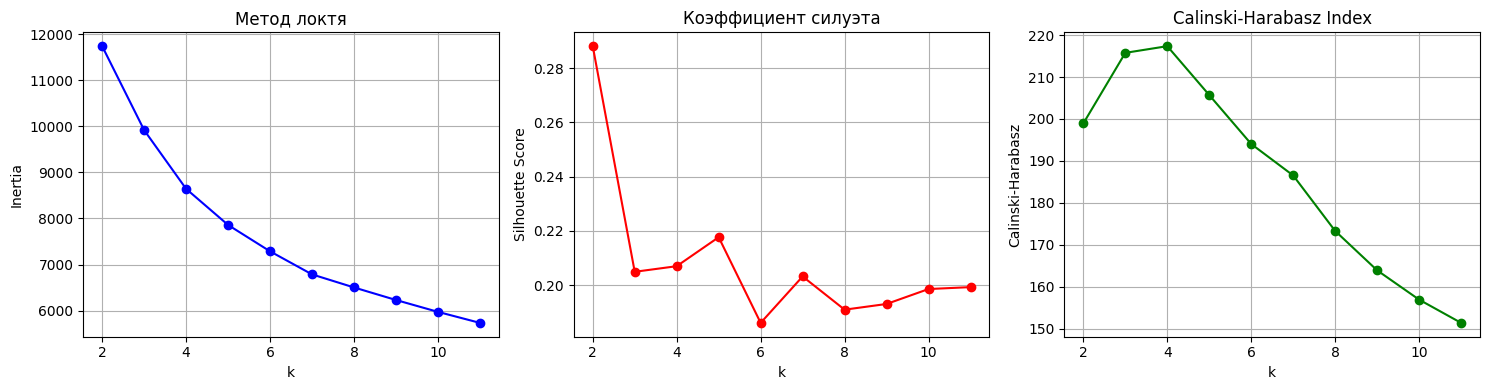

Рекомендуемое k по методу локтя: 7
Рекомендуемое k по силуэту: 2
Рекомендуемое k по Calinski-Harabasz: 4

=== Кластеризация с k=2 ===

--- Средние значения по кластерам ---
        Age_in_years       Body_length        Weight        \
                mean   std        mean    std   mean   std   
Cluster                                                      
0               0.35  0.25       20.39   7.81   2.19  1.29   
1               5.33  2.43       46.54  14.89   5.85  2.08   

        Owner_play_time_minutes        Sleep_time_hours        
                           mean    std             mean   std  
Cluster                                                        
0                         35.12  11.00            17.40  3.50  
1                         21.75   9.99            15.73  2.46  

--- Распределение категориальных признаков ---

Breed:
Breed    Angora  Maine coon  Ragdoll
Cluster                             
0         0.279       0.298    0.423
1         0.274       0.322  

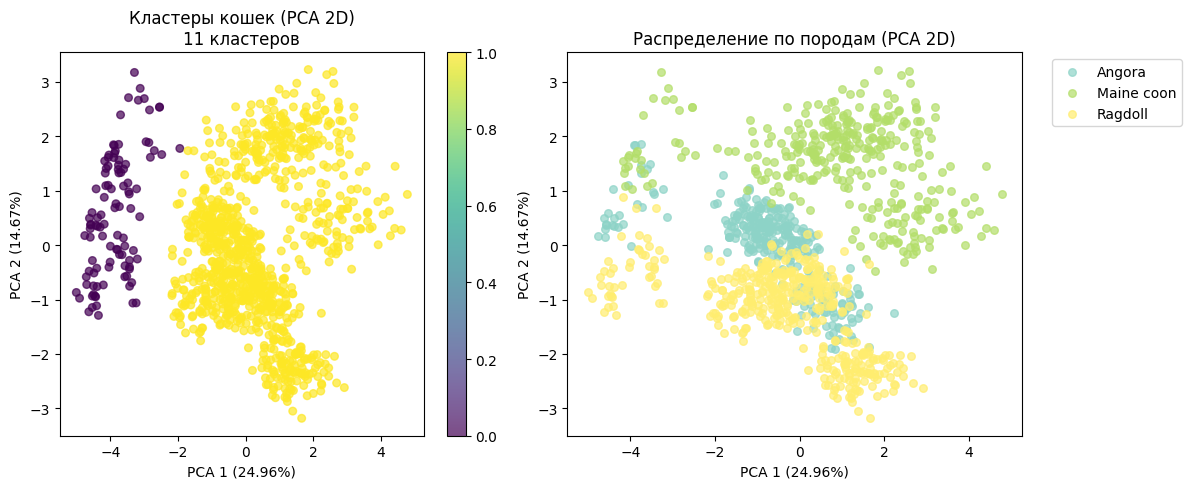


--- Размеры кластеров ---
Cluster
0    104
1    967
Name: count, dtype: int64

=== ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ ===

--- Профили кластеров ---
   Cluster  Size Main_Breed  Avg_Age  Avg_Weight
0        0   104    Ragdoll     0.35        2.19
1        1   967    Ragdoll     5.33        5.85

DBSCAN: 0 кластеров
Выбросы: 1071


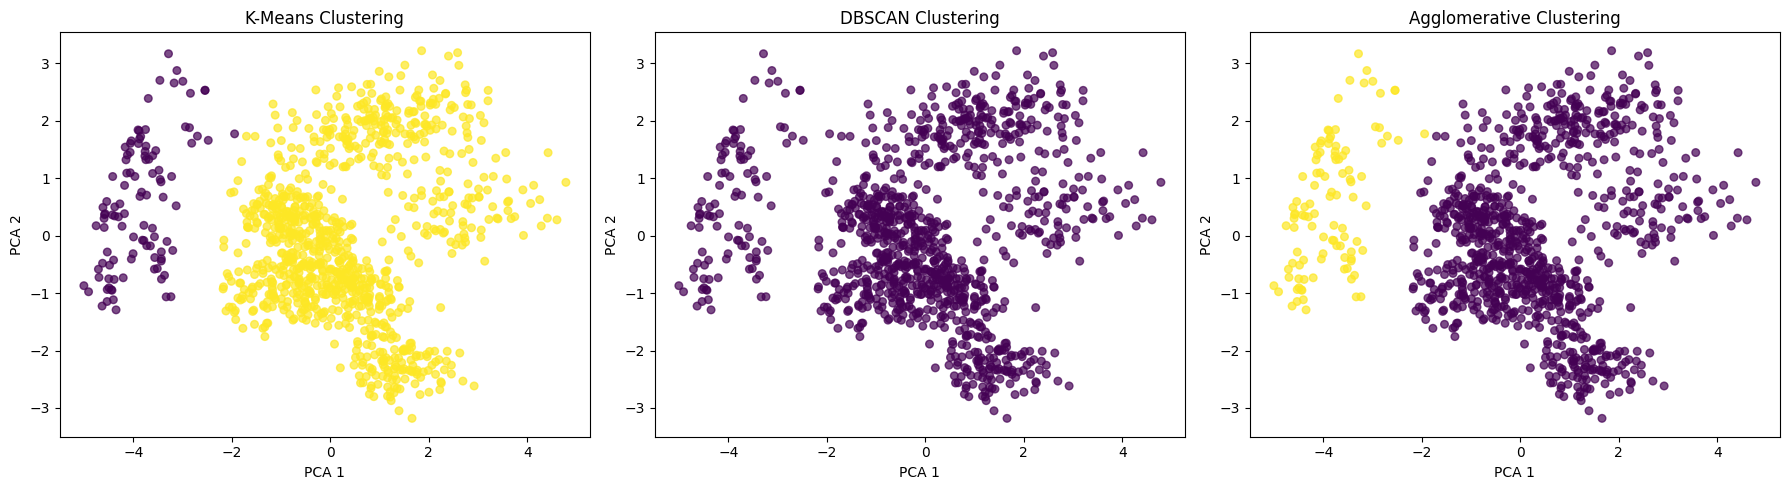

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import numpy as np


# === 5. Расширенный подбор оптимального k ===
inertia = []
silhouette = []
calinski = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)

    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_df, labels))
    calinski.append(calinski_harabasz_score(scaled_df, labels))

# Визуализация методов оценки
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(K, inertia, "bo-")
plt.title("Метод локтя")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(K, silhouette, "ro-")
plt.title("Коэффициент силуэта")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(K, calinski, "go-")
plt.title("Calinski-Harabasz Index")
plt.xlabel("k")
plt.ylabel("Calinski-Harabasz")
plt.grid(True)

plt.tight_layout()
plt.show()

# === 6. Автоматический выбор k ===
# Находим "локоть" для inertia
inertia_diff = np.diff(inertia)
inertia_diff_ratio = inertia_diff[:-1] / inertia_diff[1:]
elbow_k = np.argmax(inertia_diff_ratio) + 3  # +3 потому что начинаем с k=2

# Находим максимум для silhouette
best_silhouette_k = K[np.argmax(silhouette)]

# Находим максимум для Calinski-Harabasz
best_calinski_k = K[np.argmax(calinski)]

print(f"Рекомендуемое k по методу локтя: {elbow_k}")
print(f"Рекомендуемое k по силуэту: {best_silhouette_k}")
print(f"Рекомендуемое k по Calinski-Harabasz: {best_calinski_k}")

# Выбираем оптимальное k (можно настроить логику выбора)
optimal_k = best_silhouette_k  # или выбрать другое на основе анализа
#optimal_k = 4

# === 7. Финальная кластеризация ===
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(scaled_df)

# === 8. Детальный анализ кластеров ===
print(f"\n=== Кластеризация с k={optimal_k} ===")

# Анализ числовых признаков по кластерам
print("\n--- Средние значения по кластерам ---")
numeric_summary = df.groupby("Cluster")[numeric].agg(['mean', 'std']).round(2)
print(numeric_summary)

# Анализ категориальных признаков
print("\n--- Распределение категориальных признаков ---")
for col in categorical:
    if col in df.columns:
        print(f"\n{col}:")
        cluster_summary = df.groupby("Cluster")[col].value_counts(normalize=True).unstack().fillna(0).round(3)
        print(cluster_summary.head(10))  # Показываем топ категорий

# === 9. Визуализация через PCA ===
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"],
                     cmap="viridis", s=30, alpha=0.7)
plt.colorbar(scatter)
plt.title(f"Кластеры кошек (PCA 2D)\n{k} кластеров")
plt.xlabel(f"PCA 1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PCA 2 ({pca.explained_variance_ratio_[1]:.2%})")

# Визуализация по породам
plt.subplot(1, 2, 2)
breeds = df["Breed"].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(breeds)))

for i, breed in enumerate(breeds):
    mask = df["Breed"] == breed
    plt.scatter(pca_result[mask, 0], pca_result[mask, 1],
               c=[colors[i]], label=breed, s=30, alpha=0.7)

plt.title("Распределение по породам (PCA 2D)")
plt.xlabel(f"PCA 1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PCA 2 ({pca.explained_variance_ratio_[1]:.2%})")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# === 10. Анализ размера кластеров ===
cluster_sizes = df["Cluster"].value_counts().sort_index()
print("\n--- Размеры кластеров ---")
print(cluster_sizes)

# === 11. Интерпретация кластеров ===
print("\n=== ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ ===")

# Создаем профили кластеров
cluster_profiles = []
for cluster in range(optimal_k):
    cluster_data = df[df["Cluster"] == cluster]

    profile = {
        "Cluster": cluster,
        "Size": len(cluster_data),
        "Main_Breed": cluster_data["Breed"].mode().iloc[0] if not cluster_data["Breed"].mode().empty else "Mixed",
        "Avg_Age": cluster_data["Age_in_years"].mean(),
        "Avg_Weight": cluster_data["Weight"].mean()
    }
    cluster_profiles.append(profile)
    ''',
        "Avg_Play_Time": cluster_data["Owner_play_time_minutes"].mean(),
        "Avg_Sleep": cluster_data["Sleep_time_hours"].mean(),
        "Outdoor_Percent": (cluster_data["Allowed_outdoor"] == True).mean() * 100,
        "Neutered_Percent": (cluster_data["Neutered_or_spayed"] == True).mean() * 100'''

# Выводим профили
profiles_df = pd.DataFrame(cluster_profiles)
print("\n--- Профили кластеров ---")
print(profiles_df.round(2))


# === 12. Альтернативные алгоритмы кластеризации ===
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# Попробуем DBSCAN для сравнения
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_df)

print(f"\nDBSCAN: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} кластеров")
print(f"Выбросы: {sum(dbscan_labels == -1)}")

# Иерархическая кластеризация
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(scaled_df)

# Сравнение результатов
df["DBSCAN_Cluster"] = dbscan_labels
df["Agglo_Cluster"] = agglo_labels

# === 13. Визуализация сравнения алгоритмов ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

algorithms = [
    ("K-Means", "Cluster"),
    ("DBSCAN", "DBSCAN_Cluster"),
    ("Agglomerative", "Agglo_Cluster")
]

for i, (name, col) in enumerate(algorithms):
    axes[i].scatter(pca_result[:, 0], pca_result[:, 1],
                   c=df[col], cmap="viridis", s=30, alpha=0.7)
    axes[i].set_title(f"{name} Clustering")
    axes[i].set_xlabel("PCA 1")
    axes[i].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()